# Generador de graficos


## Main Code !!!Ejecutar primero, luego si cualquiera de los graficos mas abajo

In [ ]:
# V3 (V1 & V2 is into Archive files)

import numpy as np
import matplotlib.pyplot as plt

# Conversión mm → pt y mm → in
def mm2pt(mm):
  return mm * 2.83465

def mm2in(mm):
  return mm / 23.4555555 #25.4 #23.455555 # 25.4 # En realidad la conversion de inches a mm es 25.4, pero coloco, 23.45, porque al exportar
                            # como svg desde aqui, y luego importar en inkscape, obtengo unas medidas mas precisas a las
                            # que establesco aqui en estos codigos.

# Función generadora de muestreo adaptativo
def muestreo_adaptativo(func, segmentos, densidades):
    puntos = []
    for (a, b), n in zip(segmentos, densidades):
        puntos.append(np.linspace(a, b, n))
    return np.concatenate(puntos)

# Cálculo automático de límites según tamaño de figura, paso físico y tick_step
def calcular_limites(fig_size_mm, paso_mm, tick_step):
    ancho_mm, alto_mm = fig_size_mm
    divisiones_x = int(ancho_mm // paso_mm)
    divisiones_y = int(alto_mm // paso_mm)
    rango_x = (divisiones_x // 2) * tick_step
    rango_y = (divisiones_y // 2) * tick_step
    return (-rango_x, rango_x), (-rango_y, rango_y)

# Función para graficar solo marcadores con configuración completa y varias funciones con sus configuraciones personalizadas
def graficar_funciones(config):

    # Crear figura y ejes
    fig_w, fig_h = mm2in(config['fig_size_mm'][0]), mm2in(config['fig_size_mm'][1])
    fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=config.get('dpi', 100))

    # Convertir grosores de líneas y tamaños de marcadores
    lw_grid = mm2pt(config['grid_linewidth_mm'])
    lw_axis = mm2pt(config['axis_linewidth_mm'])
    curve_lws = [mm2pt(lw) for lw in config['curve_linewidths']]
    marker_sizes = [mm2pt(sz) for sz in config['marker_sizes']]

    # Definir límites automáticos si está activado
    if config.get('auto_limits', False):
        xlim, ylim = calcular_limites(config['fig_size_mm'], config['step_mm'], config['tick_step'])
        config['xlim'] = xlim
        config['ylim'] = ylim

    # Definir dominio continuo
    x_cont = np.linspace(config['xlim'][0], config['xlim'][1], 500)

    for i, f in enumerate(config['functions']):
        # Curvas continuas o discontinuas
        ax.plot(x_cont, f(x_cont), config['curve_styles'][i], linewidth=curve_lws[i], label=config['labels'][i])
        # Marcadores
        x_marks = muestreo_adaptativo(f, config['marker_segments'][i], config['marker_densities'][i])
        ax.plot(x_marks, f(x_marks), linestyle='None', marker=config['marker_shapes'][i],
                markersize=marker_sizes[i], markeredgewidth=0.2, markerfacecolor='white', label=config['labels'][i])

    # Configurar ticks y límites
    xticks = np.arange(config['xlim'][0], config['xlim'][1] + config['tick_step'], config['tick_step'])
    yticks = np.arange(config['ylim'][0], config['ylim'][1] + config['tick_step'], config['tick_step'])
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xlim(config['xlim'])
    ax.set_ylim(config['ylim'])

    # Dibujar ejes en 0 y cuadrícula
    ax.axhline(0, color='black', linewidth=lw_axis)
    ax.axvline(0, color='black', linewidth=lw_axis)
    ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=lw_grid)

    # Quitar etiquetas numéricas de ejes
    ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
    ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

    # Añadir marcas táctiles en los ejes
    for y in yticks:
        ax.plot([0.4, -0.4], [y, y], color='black', linewidth=lw_axis)
    for x in xticks:
        ax.plot([x, x], [0.4, -0.4], color='black', linewidth=lw_axis)

    # Ajustar márgenes y relación 1:1
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    ax.set_aspect(1)

    # Mostrar leyenda si está activado
    if config.get('show_legend', False):
        ax.legend()

    # Guardar imagen
    plt.savefig(config['output_filename'], format=config['export_format'], bbox_inches='tight')
    plt.show()

## Polynomial Functions


Placa A: tan(θ) que incluya sen(θ) y cos(θ) como referencias. La línea del coseno tendría una forma transversal de triángulo

Placa B (funciones): $f(x) = x, x^2, x^3$


Placa C (funciones): $f(x) = x, \sqrt x$


Placa D (funciones): $f(x) = x,  \frac{1}{x}$


Placa E (funciones): $f(x) = x, |x|$

Creo que con $-7 < x < 7$ quedaría bien

### Placa B (funciones): $f(x) = x, x^2, x^3$

#### $Format \ A5 \rightarrow f(x) = x, x^2, x^3$

In [ ]:
# V2 (V1 is into Archive files)

config_x_x2_x3_A5 = {
    # Funciones que se graficarán (pueden ser lambda o definidas)
    'functions': [
        lambda x: x,
        lambda x: x**2,
        lambda x: x**3
    ],

    # Límites de los ejes (xmin, xmax), (ymin, ymax)
    'auto_limits': True,   # Activa el cálculo automático de límites de ejes para ajustar la cantidad de divisiones
                           # según el tamaño físico de la figura (en mm) y el tamaño físico deseado para cada paso.
    # Distancia en mm entre las divisiones
    'step_mm': 7.45,       # Tamaño físico en milímetros que debe ocupar cada paso en los ejes (por ejemplo,
                           # entre dos divisiones consecutivas del eje x o y separadas por 'tick_step' unidades)

    # Paso entre divisiones de los ejes
    'tick_step': 0.5,      # Valor numérico que representa cada paso entre marcas de división en los ejes.
                           # Por ejemplo, de 0 a 0.5, de 0.5 a 1.0, etc.

    # Etiquetas para cada curva (se muestran en la leyenda)
    'labels': ['$x$', '$x^2$', '$x^3$'],

    # Estilo de línea para cada curva
    'curve_styles': ['-', '-', '-'],

    # Grosor de línea en mm
    'curve_linewidths': [1.0, 1.3, 1.6],

    # Símbolo del marcador para cada función ('o', 's', '^', etc.)
    'marker_shapes': ['o', 's', '^'],

    # Tamaño de marcador en mm
    'marker_sizes': [3.0, 3.0, 3.5],

    # Segmentos para muestreo adaptado (más puntos donde convenga)
    'marker_segments': [
            [[-5.5, -3.5], [-3.5, 3.5], [3.5, 5.5]],                                         # Para x
            [[-5.5, -2], [-2, -1], [-1, 1], [1, 2], [2, 5.5]],                                 # Para x^2
            [[-5.5, -1.5], [-1.5, -1], [-1, -0.5], [-0.5, 0.5], [0.5,1], [1, 1.5], [1.5, 5.5]] # Para x^3
            ],
    # Densidad de puntos por segmento
    'marker_densities': [
            [0, 20, 0],              #Para x
            [0, 7, 7, 7,0],          #Para x^2
            [0, 6, 4, 3, 4, 6, 0]    #Para x^3
            ],

    # Dimensiones de la figura en mm (ancho, alto)
    'fig_size_mm': (173, 113), # La relacion es 113 * 1.535 = 173.45 ; A4 -> 210 x 148.5 mm

    'dpi': 96,  # resolución física en puntos por pulgada para la figura exportada y renderizada, 96 es lo estandar en inkscape

    # Grosor de líneas de cuadrícula en mm
    'grid_linewidth_mm': 0.25,

    # Grosor de ejes en mm
    'axis_linewidth_mm': 0.6,

    # Nombre del archivo de salida
    'output_filename': 'x_x2_x3_A5_V1_grafica_tactil_Collab.svg',

    # Formato de exportación (svg, png, pdf…)
    'export_format': 'svg',

    # Mostrar leyenda o no (True/False)
    'show_legend': False
}

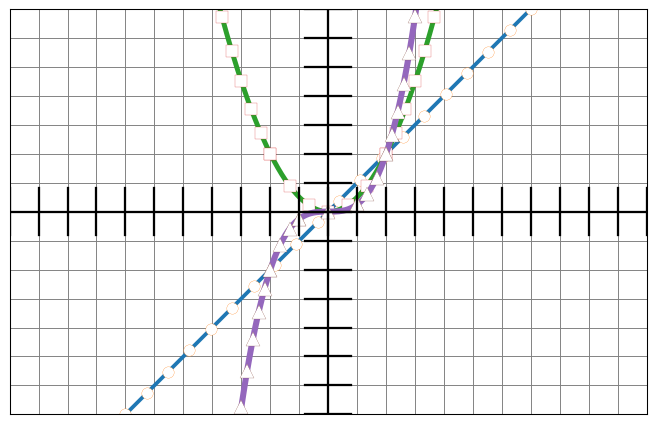

In [ ]:
graficar_funciones(config_x_x2_x3_A5)

#### $Format \ A4 \rightarrow f(x) = x, x^2, x^3$

In [ ]:
# V3 (V1 & V2 is into Archive files)

config_x_x2_x3_A4 = {
    # Funciones que se graficarán (pueden ser lambda o definidas)
    'functions': [
        lambda x: x,
        lambda x: x**2,
        lambda x: x**3
    ],

    # Límites de los ejes (xmin, xmax), (ymin, ymax)
    'auto_limits': True,   # Activa el cálculo automático de límites de ejes para ajustar la cantidad de divisiones
                           # según el tamaño físico de la figura (en mm) y el tamaño físico deseado para cada paso.
    # Distancia en mm entre las divisiones
    'step_mm': 7.45,       # Tamaño físico en milímetros que debe ocupar cada paso en los ejes (por ejemplo,
                           # entre dos divisiones consecutivas del eje x o y separadas por 'tick_step' unidades)

    # Paso entre divisiones de los ejes
    'tick_step': 0.5,      # Valor numérico que representa cada paso entre marcas de división en los ejes.
                           # Por ejemplo, de 0 a 0.5, de 0.5 a 1.0, etc.

    # Etiquetas para cada curva (se muestran en la leyenda)
    'labels': ['$x$', '$x^2$', '$x^3$'],

    # Estilo de línea para cada curva
    'curve_styles': ['-', '-', '-'],

    # Grosor de línea en mm
    'curve_linewidths': [1.0, 1.3, 1.6],

    # Símbolo del marcador para cada función ('o', 's', '^', etc.)
    'marker_shapes': ['o', 's', '^'],

    # Tamaño de marcador en mm
    'marker_sizes': [3.0, 3.0, 3.5],

    # Segmentos para muestreo adaptado (más puntos donde convenga)
    'marker_segments': [
            [[-8.5, -5.5], [-5.5, 5.5], [5.5, 8.5]],                                                     # Para x
            [[-8.5, -2.4], [-2.4, -1.7], [-1.7, -1.3], [-1.3, -0.7], [-0.7, 0.7], [0.7, 1.3], [1.3, 1.7], [1.7, 2.4], [2.4, 8.5]],  #Para x^2
            [[-8.5, -1.8], [-1.8, -1.6], [-1.6, -1.4], [-1.4, -0.8], [-0.8, -0.4], [-0.4, 0.4], [0.4, 0.8], [0.8, 1.4], [1.4, 1.6], [1.6, 1.8], [1.8, 8.5]] # Para x^3
            ],
    # Densidad de puntos por segmento
    'marker_densities': [
            [0, 30, 0],              #Para x
            [0, 7, 4, 4, 5, 4, 4, 7, 0],          #Para x^2
            [0, 4, 4, 7, 3, 3, 3, 7, 4, 4, 0]    #Para x^3
            ],

    # Dimensiones de la figura en mm (ancho, alto)
    'fig_size_mm': (262, 170), # La relacion es 170 * 1.535 = 262.17 ; A4 -> 297 x 210 mm, pero lo que obtengo al meter 268 x 169 es 259 x 169

    'dpi': 96,  # resolución física en puntos por pulgada para la figura exportada y renderizada, 96 es lo estandar en inkscape

    # Grosor de líneas de cuadrícula en mm
    'grid_linewidth_mm': 0.25,

    # Grosor de ejes en mm
    'axis_linewidth_mm': 0.6,

    # Nombre del archivo de salida
    'output_filename': 'x_x2_x3_A4_V1_grafica_tactil_Collab.svg',

    # Formato de exportación (svg, png, pdf…)
    'export_format': 'svg',

    # Mostrar leyenda o no (True/False)
    'show_legend': False
}

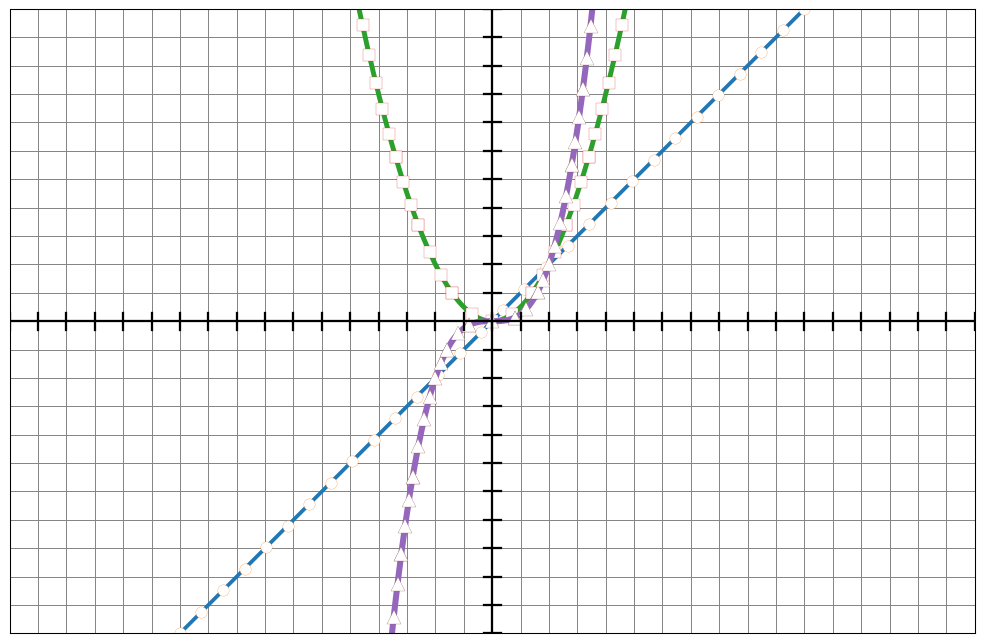

In [ ]:
graficar_funciones(config_x_x2_x3_A4)

### Placa C (funciones): $f(x) = x, \sqrt x$

#### $Format \ A5 \rightarrow f(x) = x, \sqrt x$

In [ ]:
# V2 (V1 is into Archive files)

config_x_x2_x3_A5 = {
    # Funciones que se graficarán (pueden ser lambda o definidas)
    'functions': [
        lambda x: x,
        lambda x: x**2,
        lambda x: x**3
    ],

    # Límites de los ejes (xmin, xmax), (ymin, ymax)
    'auto_limits': True,   # Activa el cálculo automático de límites de ejes para ajustar la cantidad de divisiones
                           # según el tamaño físico de la figura (en mm) y el tamaño físico deseado para cada paso.
    # Distancia en mm entre las divisiones
    'step_mm': 7.45,       # Tamaño físico en milímetros que debe ocupar cada paso en los ejes (por ejemplo,
                           # entre dos divisiones consecutivas del eje x o y separadas por 'tick_step' unidades)

    # Paso entre divisiones de los ejes
    'tick_step': 0.5,      # Valor numérico que representa cada paso entre marcas de división en los ejes.
                           # Por ejemplo, de 0 a 0.5, de 0.5 a 1.0, etc.

    # Etiquetas para cada curva (se muestran en la leyenda)
    'labels': ['$x$', '$x^2$', '$x^3$'],

    # Estilo de línea para cada curva
    'curve_styles': ['-', '-', '-'],

    # Grosor de línea en mm
    'curve_linewidths': [1.0, 1.3, 1.6],

    # Símbolo del marcador para cada función ('o', 's', '^', etc.)
    'marker_shapes': ['o', 's', '^'],

    # Tamaño de marcador en mm
    'marker_sizes': [3.0, 3.0, 3.5],

    # Segmentos para muestreo adaptado (más puntos donde convenga)
    'marker_segments': [
            [[-5.5, -3.5], [-3.5, 3.5], [3.5, 5.5]],                                         # Para x
            [[-5.5, -2], [-2, -1], [-1, 1], [1, 2], [2, 5.5]],                                 # Para x^2
            [[-5.5, -1.5], [-1.5, -1], [-1, -0.5], [-0.5, 0.5], [0.5,1], [1, 1.5], [1.5, 5.5]] # Para x^3
            ],
    # Densidad de puntos por segmento
    'marker_densities': [
            [0, 20, 0],              #Para x
            [0, 7, 7, 7,0],          #Para x^2
            [0, 6, 4, 3, 4, 6, 0]    #Para x^3
            ],

    # Dimensiones de la figura en mm (ancho, alto)
    'fig_size_mm': (173, 113), # La relacion es 113 * 1.535 = 173.45 ; A4 -> 210 x 148.5 mm

    'dpi': 96,  # resolución física en puntos por pulgada para la figura exportada y renderizada, 96 es lo estandar en inkscape

    # Grosor de líneas de cuadrícula en mm
    'grid_linewidth_mm': 0.25,

    # Grosor de ejes en mm
    'axis_linewidth_mm': 0.6,

    # Nombre del archivo de salida
    'output_filename': 'x_x2_x3_A5_V1_grafica_tactil_Collab.svg',

    # Formato de exportación (svg, png, pdf…)
    'export_format': 'svg',

    # Mostrar leyenda o no (True/False)
    'show_legend': False
}

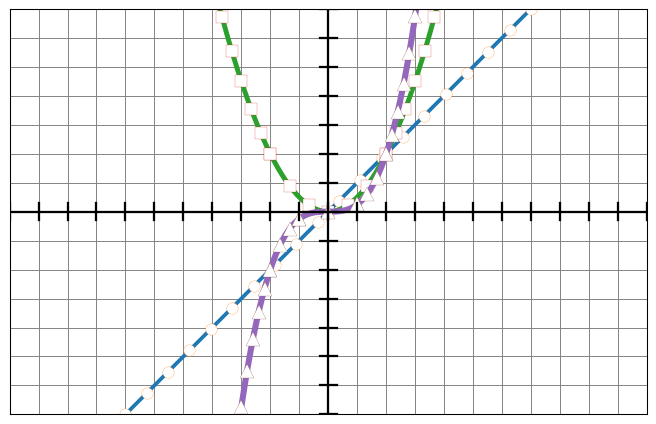

In [ ]:
graficar_funciones(config_x_x2_x3_A5)

#### $Format \ A4 \rightarrow f(x) = x, \sqrt x$

In [ ]:
# V3 (V1 & V2 is into Archive files)

config_x_x2_x3_A4 = {
    # Funciones que se graficarán (pueden ser lambda o definidas)
    'functions': [
        lambda x: x,
        lambda x: x**2,
        lambda x: x**3
    ],

    # Límites de los ejes (xmin, xmax), (ymin, ymax)
    'auto_limits': True,   # Activa el cálculo automático de límites de ejes para ajustar la cantidad de divisiones
                           # según el tamaño físico de la figura (en mm) y el tamaño físico deseado para cada paso.
    # Distancia en mm entre las divisiones
    'step_mm': 7.45,       # Tamaño físico en milímetros que debe ocupar cada paso en los ejes (por ejemplo,
                           # entre dos divisiones consecutivas del eje x o y separadas por 'tick_step' unidades)

    # Paso entre divisiones de los ejes
    'tick_step': 0.5,      # Valor numérico que representa cada paso entre marcas de división en los ejes.
                           # Por ejemplo, de 0 a 0.5, de 0.5 a 1.0, etc.

    # Etiquetas para cada curva (se muestran en la leyenda)
    'labels': ['$x$', '$x^2$', '$x^3$'],

    # Estilo de línea para cada curva
    'curve_styles': ['-', '-', '-'],

    # Grosor de línea en mm
    'curve_linewidths': [1.0, 1.3, 1.6],

    # Símbolo del marcador para cada función ('o', 's', '^', etc.)
    'marker_shapes': ['o', 's', '^'],

    # Tamaño de marcador en mm
    'marker_sizes': [3.0, 3.0, 3.5],

    # Segmentos para muestreo adaptado (más puntos donde convenga)
    'marker_segments': [
            [[-8.5, -5.5], [-5.5, 5.5], [5.5, 8.5]],                                                     # Para x
            [[-8.5, -2.4], [-2.4, -1.7], [-1.7, -1.3], [-1.3, -0.7], [-0.7, 0.7], [0.7, 1.3], [1.3, 1.7], [1.7, 2.4], [2.4, 8.5]],  #Para x^2
            [[-8.5, -1.8], [-1.8, -1.6], [-1.6, -1.4], [-1.4, -0.8], [-0.8, -0.4], [-0.4, 0.4], [0.4, 0.8], [0.8, 1.4], [1.4, 1.6], [1.6, 1.8], [1.8, 8.5]] # Para x^3
            ],
    # Densidad de puntos por segmento
    'marker_densities': [
            [0, 30, 0],              #Para x
            [0, 7, 4, 4, 5, 4, 4, 7, 0],          #Para x^2
            [0, 4, 4, 7, 3, 3, 3, 7, 4, 4, 0]    #Para x^3
            ],

    # Dimensiones de la figura en mm (ancho, alto)
    'fig_size_mm': (262, 170), # La relacion es 170 * 1.535 = 262.17 ; A4 -> 297 x 210 mm, pero lo que obtengo al meter 268 x 169 es 259 x 169

    'dpi': 96,  # resolución física en puntos por pulgada para la figura exportada y renderizada, 96 es lo estandar en inkscape

    # Grosor de líneas de cuadrícula en mm
    'grid_linewidth_mm': 0.25,

    # Grosor de ejes en mm
    'axis_linewidth_mm': 0.6,

    # Nombre del archivo de salida
    'output_filename': 'x_x2_x3_A4_V1_grafica_tactil_Collab.svg',

    # Formato de exportación (svg, png, pdf…)
    'export_format': 'svg',

    # Mostrar leyenda o no (True/False)
    'show_legend': False
}

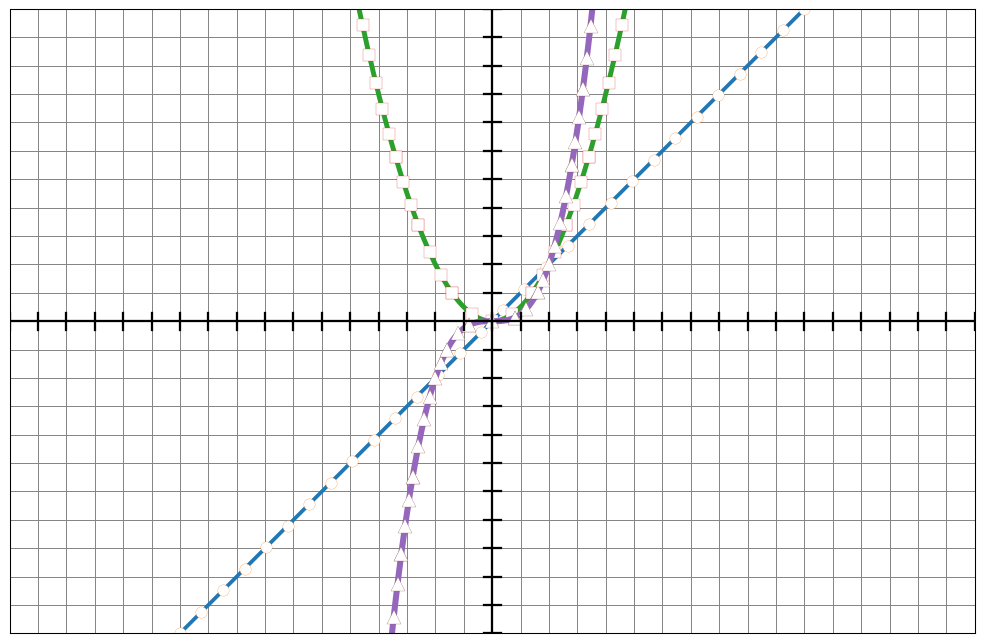

In [ ]:
graficar_funciones(config_x_x2_x3_A4)

#### Placa C (funciones): $f(x) = x, \sqrt x$




<ipython-input-15-8a3fe42d2ddd>:9: RuntimeWarning: invalid value encountered in sqrt
  y2 = np.sqrt(x)


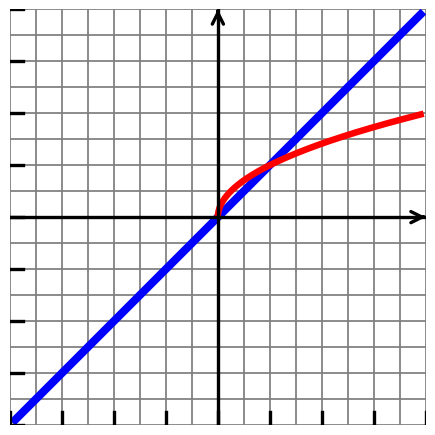

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-3.9, 3.9, 1000)

# Definir las funciones
y1 = x
y2 = np.sqrt(x)

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 132 + 30  # Ancho deseado en mm, Considera sumar 30 mm si quieres que te de la medida en los bordes
height_mm = 132  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion x
linewidth_mm_4 = 1.65  # Grosor en mm para la funcion x^2
linewidth_mm_5 = 2.05  # Grosor en mm para la funcion x^3
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos
linewidth_pt_5 = linewidth_mm_5 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$x$', color='blue', linestyle='-', linewidth=linewidth_pt_5)
ax.plot(x, y2, label=r'$\sqrt{x}$', color='red', linestyle='-', linewidth=linewidth_pt_4)

# Divisiones en el eje x en múltiplos de 1
xticks = np.arange(-4, 4.5, 0.5)
ax.set_xticks(xticks)

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-4.0, 4.5, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -4 hasta 4
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -4 hasta 4

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(4 , 0), xytext=(3.9, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 4.0), xytext=(0, 3.9),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-4.0, 4.5, 1.0):  # Marcas en el eje y
    ax.plot([-3.75, -4], [y, y], color='black', linewidth=linewidth_pt_2)

for x in np.arange(-4.0, 4.5, 1.0):  # Marcas en el eje x
    ax.plot([x, x], [-3.75, -4.0], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('x_sqrt(x)_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


### Placa D (funciones): $f(x) = x,  \frac{1}{x}$




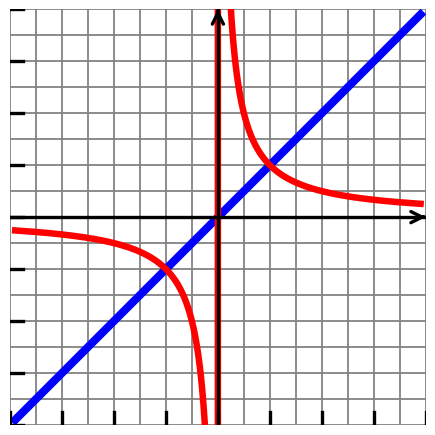

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-3.9, 3.9, 1000)

# Definir las funciones
y1 = x
y2 = 1/x

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 132 + 30  # Ancho deseado en mm, Considera sumar 30 mm si quieres que te de la medida en los bordes
height_mm = 132  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion x
linewidth_mm_4 = 1.65  # Grosor en mm para la funcion x^2
linewidth_mm_5 = 2.05  # Grosor en mm para la funcion x^3
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos
linewidth_pt_5 = linewidth_mm_5 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$x$', color='blue', linestyle='-', linewidth=linewidth_pt_5)
ax.plot(x, y2, label=r'$\sqrt{x}$', color='red', linestyle='-', linewidth=linewidth_pt_4)

# Divisiones en el eje x en múltiplos de 1
xticks = np.arange(-4.0, 4.5, 0.5)
ax.set_xticks(xticks)

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-4.0, 4.5, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -4 hasta 4
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -4 hasta 4

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(4 , 0), xytext=(3.9, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 4.0), xytext=(0, 3.9),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-4.0, 4.5, 1.0):  # Marcas en el eje y
    ax.plot([-3.75, -4], [y, y], color='black', linewidth=linewidth_pt_2)

for x in np.arange(-4.0, 4.5, 1.0):  # Marcas en el eje x
    ax.plot([x, x], [-3.75, -4.0], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('x_1_over_x_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


### Placa E (funciones): $f(x) = x, |x|$  

#### $Format \ A5 \rightarrow f(x) = x, |x|$

In [ ]:
# V2 (V1 is into Archive files)

config_x_abs_x_A5 = {
    # Funciones que se graficarán (pueden ser lambda o definidas)
    'functions': [
        lambda x: x,
        lambda x: np.abs(x)
    ],

    # Límites de los ejes (xmin, xmax), (ymin, ymax)
    'auto_limits': True,   # Activa el cálculo automático de límites de ejes para ajustar la cantidad de divisiones
                           # según el tamaño físico de la figura (en mm) y el tamaño físico deseado para cada paso.
    # Distancia en mm entre las divisiones
    'step_mm': 7.45,       # Tamaño físico en milímetros que debe ocupar cada paso en los ejes (por ejemplo,
                           # entre dos divisiones consecutivas del eje x o y separadas por 'tick_step' unidades)

    # Paso entre divisiones de los ejes
    'tick_step': 0.5,      # Valor numérico que representa cada paso entre marcas de división en los ejes.
                           # Por ejemplo, de 0 a 0.5, de 0.5 a 1.0, etc.

    # Etiquetas para cada curva (se muestran en la leyenda)
    'labels': ['$x$', '$x^2$', '$x^3$'],

    # Estilo de línea para cada curva
    'curve_styles': ['-', '-', '-'],

    # Grosor de línea en mm
    'curve_linewidths': [1.0, 1.3, 1.6],

    # Símbolo del marcador para cada función ('o', 's', '^', etc.)
    'marker_shapes': ['o', 's', '^'],

    # Tamaño de marcador en mm
    'marker_sizes': [3.0, 3.0, 3.5],

    # Segmentos para muestreo adaptado (más puntos donde convenga)
    'marker_segments': [
            [[-5.5, -3.5], [-3.5, 3.5], [3.5, 5.5]],  # Para x
            [[-5.5, -3.5], [-3.5, 3.5], [3.5, 5.5]]   #Para |x|
            ],
    # Densidad de puntos por segmento
    'marker_densities': [
            [0, 21, 0], #Para x
            [0, 18, 0]  #Para |x|
            ],

    # Dimensiones de la figura en mm (ancho, alto)
    'fig_size_mm': (173, 113), # La relacion es 113 * 1.535 = 173.45 ; A4 -> 210 x 148.5 mm

    'dpi': 96,  # resolución física en puntos por pulgada para la figura exportada y renderizada, 96 es lo estandar en inkscape

    # Grosor de líneas de cuadrícula en mm
    'grid_linewidth_mm': 0.25,

    # Grosor de ejes en mm
    'axis_linewidth_mm': 0.6,

    # Nombre del archivo de salida
    'output_filename': 'x_abs_x_A5_V1_grafica_tactil_Collab.svg',

    # Formato de exportación (svg, png, pdf…)
    'export_format': 'svg',

    # Mostrar leyenda o no (True/False)
    'show_legend': False
}

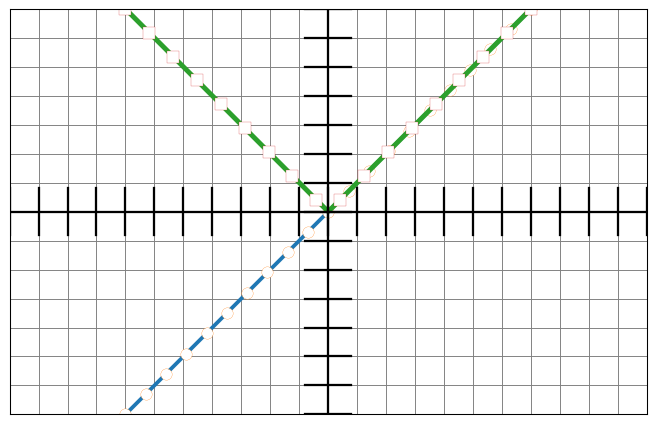

In [ ]:
graficar_funciones(config_x_abs_x_A5)

#### $Format \ A4 \rightarrow f(x) = x, |x|$

In [ ]:
# V3 (V1 & V2 is into Archive files)

config_x_abs_x_A4 = {
    # Funciones que se graficarán (pueden ser lambda o definidas)
    'functions': [
        lambda x: x,
        lambda x: np.abs(x)
    ],

    # Límites de los ejes (xmin, xmax), (ymin, ymax)
    'auto_limits': True,   # Activa el cálculo automático de límites de ejes para ajustar la cantidad de divisiones
                           # según el tamaño físico de la figura (en mm) y el tamaño físico deseado para cada paso.
    # Distancia en mm entre las divisiones
    'step_mm': 7.45,       # Tamaño físico en milímetros que debe ocupar cada paso en los ejes (por ejemplo,
                           # entre dos divisiones consecutivas del eje x o y separadas por 'tick_step' unidades)

    # Paso entre divisiones de los ejes
    'tick_step': 0.5,      # Valor numérico que representa cada paso entre marcas de división en los ejes.
                           # Por ejemplo, de 0 a 0.5, de 0.5 a 1.0, etc.

    # Etiquetas para cada curva (se muestran en la leyenda)
    'labels': ['$x$', '$x^2$', '$x^3$'],

    # Estilo de línea para cada curva
    'curve_styles': ['-', '-', '-'],

    # Grosor de línea en mm
    'curve_linewidths': [1.0, 1.3, 1.6],

    # Símbolo del marcador para cada función ('o', 's', '^', etc.)
    'marker_shapes': ['o', 's', '^'],

    # Tamaño de marcador en mm
    'marker_sizes': [3.0, 3.0, 3.5],

    # Segmentos para muestreo adaptado (más puntos donde convenga)
    'marker_segments': [
            [[-8.5, -5.5], [-5.5, 5.5], [5.5, 8.5]],  # Para x
            [[-8.5, -5.5], [-5.5, 5.5], [5.5, 8.5]]   #Para |x|
            ],
    # Densidad de puntos por segmento
    'marker_densities': [
            [0, 30, 0], #Para x
            [0, 26, 0]  #Para |x|
            ],

    # Dimensiones de la figura en mm (ancho, alto)
    'fig_size_mm': (262, 170), # La relacion es 170 * 1.535 = 262.17 ; A4 -> 297 x 210 mm, pero lo que obtengo al meter 268 x 169 es 259 x 169

    'dpi': 96,  # resolución física en puntos por pulgada para la figura exportada y renderizada, 96 es lo estandar en inkscape

    # Grosor de líneas de cuadrícula en mm
    'grid_linewidth_mm': 0.25,

    # Grosor de ejes en mm
    'axis_linewidth_mm': 0.6,

    # Nombre del archivo de salida
    'output_filename': 'x_abs_x_A4_V1_grafica_tactil_Collab.svg',

    # Formato de exportación (svg, png, pdf…)
    'export_format': 'svg',

    # Mostrar leyenda o no (True/False)
    'show_legend': False
}

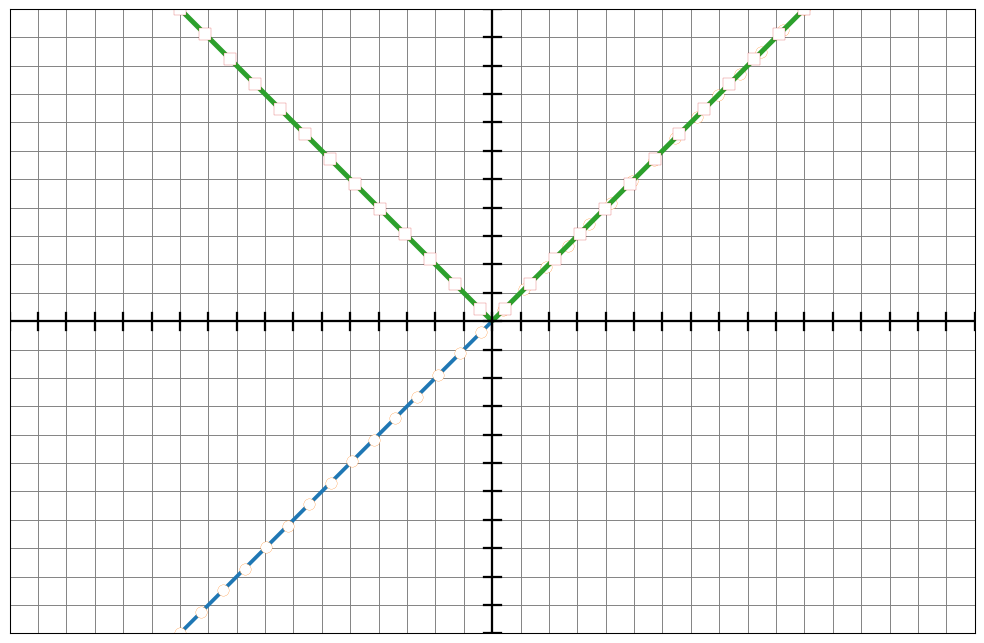

In [ ]:
graficar_funciones(config_x_abs_x_A4)

#### Placa E (funciones): $f(x) = x, |x|$  



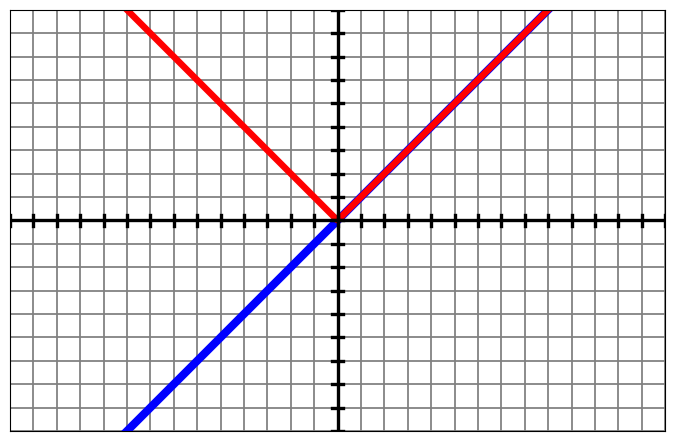

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-7, 7, 1000)

# Definir las funciones
y1 = x
y2 = np.abs(x)

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 168 + 40 # Ancho deseado en mm, Considera sumar 40 mm si quieres que te de la medida en los bordes
height_mm = 102 + 40 # Altura deseada en mm, considera sumar 40 mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion x
linewidth_mm_4 = 1.65  # Grosor en mm para la funcion x^2
linewidth_mm_5 = 2.05  # Grosor en mm para la funcion x^3
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos
linewidth_pt_5 = linewidth_mm_5 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$x$', color='blue', linestyle='-', linewidth=linewidth_pt_5)
ax.plot(x, y2, label=r'$\sqrt{x}$', color='red', linestyle='-', linewidth=linewidth_pt_4)

# Divisiones en el eje x en múltiplos de 1
xticks = np.arange(-7.0, 7.5, 0.5)
ax.set_xticks(xticks)

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-4.5, 5.0, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -4 hasta 4
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -4 hasta 4

# Ocultar los ejes superior y derecho
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# Dibujar marcas adicionales en los ejes
for y in np.arange(-4.5, 5.0, 0.5):  # Marcas en el eje y
    ax.plot([0.12, -0.12], [y, y], color='black', linewidth=linewidth_pt_2)

for x in np.arange(-7.0, 7.5, 0.5):  # Marcas en el eje x
    ax.plot([x, x], [0.12, -0.12], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('x_abs(x)_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


## Trigonometric Functions

### Placa A: tan(θ) que incluya sen(θ) y cos(θ) como referencias. La línea del coseno tendría una forma transversal de triángulo



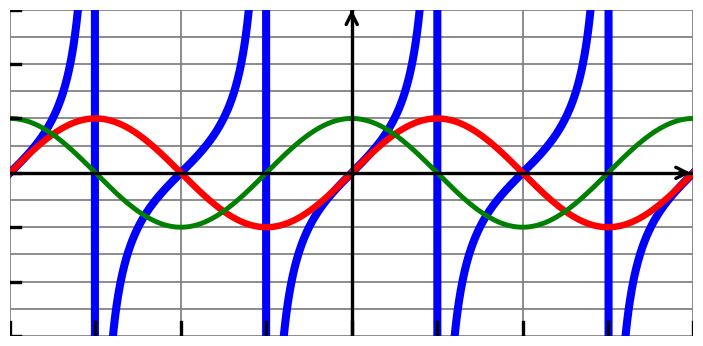

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Definir las funciones
y1 = np.tan(x)
y2 = np.sin(x)
y3 = np.cos(x)

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 174 + 43  # Ancho deseado en mm, Considera sumar 50 mm si quieres que te de la medida en los bordes
height_mm = 300  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion tan(x)
linewidth_mm_4 = 1.65  # Grosor en mm para la funcion sen(x)
linewidth_mm_5 = 2.05  # Grosor en mm para la funcion cos(x)
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos
linewidth_pt_5 = linewidth_mm_5 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$\tan(x)$', color='blue', linestyle='-', linewidth=linewidth_pt_5)
ax.plot(x, y2, label=r'$\sin(x)$', color='red', linestyle='-', linewidth=linewidth_pt_4)
ax.plot(x, y3, label=r'$\cos(x)$', color='green', linestyle='-', linewidth=linewidth_pt_3)

# Divisiones en el eje x en múltiplos de pi/2
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi/2, np.pi/2)
ax.set_xticks(xticks)

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-3.0, 3.5, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -2pi hasta 2pi
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -2 hasta 2

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(2 * np.pi , 0), xytext=(1.9 * np.pi, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 3.0), xytext=(0, 2.9),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-3.0, 3.5, 1.0):  # Marcas en el eje y
    ax.plot([-1.94*np.pi, -2*np.pi], [y, y], color='black', linewidth=linewidth_pt_2)

for x in xticks:  # Marcas en el eje x
    ax.plot([x, x], [-2.75, -3.0], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('tan(x)_sin(x)_and_cos(x)_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


### Sine Functions

### sin(x) and sin(2x)

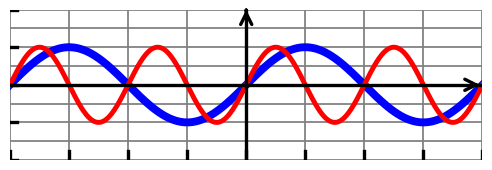

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Definir las funciones
y1 = np.sin(x)
y2 = np.sin(2 * x)

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 120 + 30  # Ancho deseado en mm, Considera sumar 30 mm si quieres que te de la medida en los bordes
height_mm = 100  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion transformada
linewidth_mm_4 = 2.00  # Grosor en mm para la funcion elemental
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$\sin(x)$', color='blue', linestyle='-', linewidth=linewidth_pt_4)
ax.plot(x, y2, label=r'$\sin(2x)$', color='red', linestyle='-', linewidth=linewidth_pt_3)

# Divisiones en el eje x en múltiplos de pi/2
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi/2, np.pi/2)
ax.set_xticks(xticks)
ax.set_xticklabels([r'$-2\pi$', r'$\frac{-3\pi}{2}$', r'$-\pi$', r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-2, 2.5, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -2pi hasta 2pi
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -2 hasta 2

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(2 * np.pi , 0), xytext=(1.9 * np.pi, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 2.0), xytext=(0, 1.9),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-2.0, 2.5, 1.0):  # Marcas en el eje y
    ax.plot([-1.94*np.pi, -2*np.pi], [y, y], color='black', linewidth=linewidth_pt_2)

for x in xticks:  # Marcas en el eje x
    ax.plot([x, x], [-1.75, -2.0], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('sin_x_sin_2x_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


### sin(x) and sin(x + 4/pi)

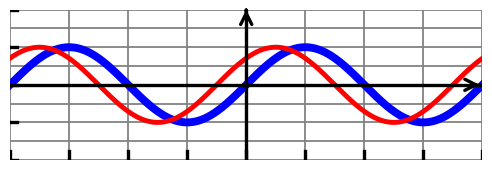

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Definir las funciones
y1 = np.sin(x)
y2 = np.sin(x + np.pi/4)

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 120 + 30  # Ancho deseado en mm, Considera sumar 30 mm si quieres que te de la medida en los bordes
height_mm = 100  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion transformada
linewidth_mm_4 = 2.00  # Grosor en mm para la funcion elemental
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$\sin(x)$', color='blue', linestyle='-', linewidth=linewidth_pt_4)
ax.plot(x, y2, label=r'$\sin(x + \frac{\pi}{4})$', color='red', linestyle='-', linewidth=linewidth_pt_3)

# Divisiones en el eje x en múltiplos de pi/2
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi/2, np.pi/2)
ax.set_xticks(xticks)
ax.set_xticklabels([r'$-2\pi$', r'$\frac{-3\pi}{2}$', r'$-\pi$', r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-2.0, 2.5, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -2pi hasta 2pi
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -2 hasta 2

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(2 * np.pi , 0), xytext=(1.9 * np.pi, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 2.0), xytext=(0, 1.9),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-2.0, 2.5, 1.0):  # Marcas en el eje y
    ax.plot([-1.94*np.pi, -2*np.pi], [y, y], color='black', linewidth=linewidth_pt_2)

for x in xticks:  # Marcas en el eje x
    ax.plot([x, x], [-1.75, -2.0], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('sin_x_sin_x_plus_pi_4_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


### sin(x) and 2sin(2x + pi/4)

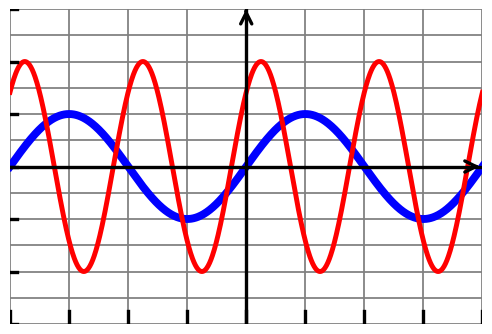

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Definir las funciones
y1 = np.sin(x)
y2 = 2 * np.sin(2 * x + np.pi/4)

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 120 + 30  # Ancho deseado en mm, Considera sumar 30 mm si quieres que te de la medida en los bordes
height_mm = 100  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion transformada
linewidth_mm_4 = 2.00  # Grosor en mm para la funcion elemental
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$\sin(x)$', color='blue', linestyle='-', linewidth=linewidth_pt_4)
ax.plot(x, y2, label=r'$\sin(x + \frac{\pi}{4})$', color='red', linestyle='-', linewidth=linewidth_pt_3)

# Divisiones en el eje x en múltiplos de pi/2
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi/2, np.pi/2)
ax.set_xticks(xticks)
ax.set_xticklabels([r'$-2\pi$', r'$\frac{-3\pi}{2}$', r'$-\pi$', r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-3.0, 3.5, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -2pi hasta 2pi
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -2 hasta 2

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(2 * np.pi , 0), xytext=(1.9 * np.pi, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 3.0), xytext=(0, 2.9),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-3.0, 3.5, 1.0):  # Marcas en el eje y
    ax.plot([-1.94*np.pi, -2*np.pi], [y, y], color='black', linewidth=linewidth_pt_2)

for x in xticks:  # Marcas en el eje x
    ax.plot([x, x], [-2.75, -3.0], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
#ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('sin_x_sin_x_plus_pi_4_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


### sin(x) and 2sin(x + pi/4)

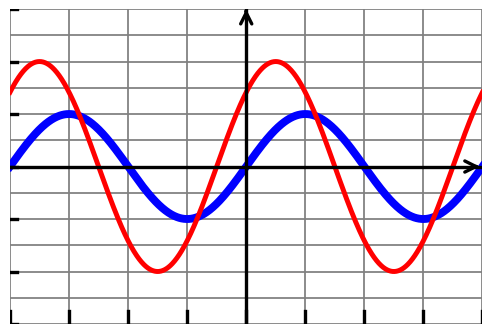

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Definir las funciones
y1 = np.sin(x)
y2 = 2 * np.sin(x + np.pi/4)

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 120 + 30  # Ancho deseado en mm, Considera sumar 30 mm si quieres que te de la medida en los bordes
height_mm = 100  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion transformada
linewidth_mm_4 = 2.00  # Grosor en mm para la funcion elemental
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$\sin(x)$', color='blue', linestyle='-', linewidth=linewidth_pt_4)
ax.plot(x, y2, label=r'$\sin(x + \frac{\pi}{4})$', color='red', linestyle='-', linewidth=linewidth_pt_3)

# Divisiones en el eje x en múltiplos de pi/2
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi/2, np.pi/2)
ax.set_xticks(xticks)
ax.set_xticklabels([r'$-2\pi$', r'$\frac{-3\pi}{2}$', r'$-\pi$', r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-3.0, 3.5, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -2pi hasta 2pi
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -2 hasta 2

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(2 * np.pi , 0), xytext=(1.9 * np.pi, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 3.0), xytext=(0, 2.9),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-3.0, 3.5, 1.0):  # Marcas en el eje y
    ax.plot([-1.94*np.pi, -2*np.pi], [y, y], color='black', linewidth=linewidth_pt_2)

for x in xticks:  # Marcas en el eje x
    ax.plot([x, x], [-2.75, -3.0], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
#ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('sin_x_and_2sin_x_plus_pi_4_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


### sin(x) and Asin(x), with A = 2

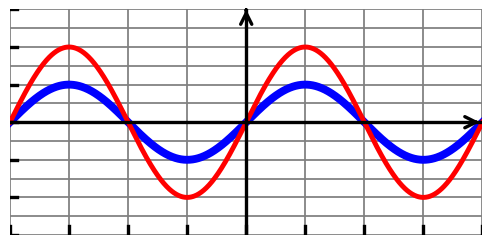

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Definir la constante de amplitud

A = 2

# Definir las funciones
y1 = np.sin(x)
y2 = A * np.sin(x)

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 120 + 30  # Ancho deseado en mm, Considera sumar 30 mm si quieres que te de la medida en los bordes
height_mm = 100  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion transformada
linewidth_mm_4 = 2.00  # Grosor en mm para la funcion elemental
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$\sin(x)$', color='blue', linestyle='-', linewidth=linewidth_pt_4)
ax.plot(x, y2, label=r'$A \sin(x)$', color='red', linestyle='-', linewidth=linewidth_pt_3)

# Divisiones en el eje x en múltiplos de pi/2
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi/2, np.pi/2)
ax.set_xticks(xticks)
ax.set_xticklabels([r'$-2\pi$', r'$\frac{-3\pi}{2}$', r'$-\pi$', r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-3.0, 3.5, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -2pi hasta 2pi
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -2 hasta 2

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(2 * np.pi , 0), xytext=(1.9 * np.pi, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 3.0), xytext=(0, 2.9),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-3.0, 3.5, 1.0):  # Marcas en el eje y
    ax.plot([-1.94*np.pi, -2*np.pi], [y, y], color='black', linewidth=linewidth_pt_2)

for x in xticks:  # Marcas en el eje x
    ax.plot([x, x], [-2.75, -3.0], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('sin_x_Asin_x_plot_A=2.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()

### sin(x) and Asin(x), with A = 4

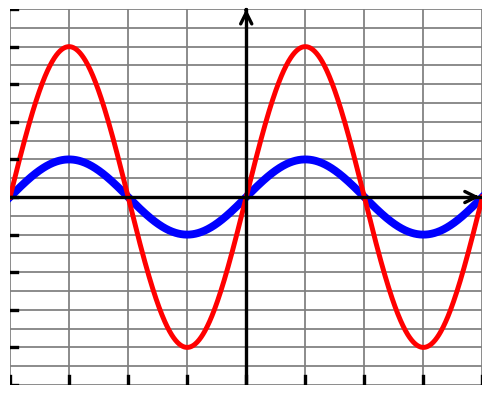

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Definir la constante de amplitud

A = 4

# Definir las funciones
y1 = np.sin(x)
y2 = A * np.sin(x)

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 120 + 30  # Ancho deseado en mm, Considera sumar 30 mm si quieres que te de la medida en los bordes
height_mm = 200  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion transformada
linewidth_mm_4 = 2.00  # Grosor en mm para la funcion elemental
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$\sin(x)$', color='blue', linestyle='-', linewidth=linewidth_pt_4)
ax.plot(x, y2, label=r'$A \sin(x)$', color='red', linestyle='-', linewidth=linewidth_pt_3)

# Divisiones en el eje x en múltiplos de pi/2
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi/2, np.pi/2)
ax.set_xticks(xticks)
ax.set_xticklabels([r'$-2\pi$', r'$\frac{-3\pi}{2}$', r'$-\pi$', r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-5.0, 5.5, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -2pi hasta 2pi
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -2 hasta 2

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(2 * np.pi , 0), xytext=(1.9 * np.pi, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 5.0), xytext=(0, 4.9),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-5.0, 5.5, 1.0):  # Marcas en el eje y
    ax.plot([-1.94*np.pi, -2*np.pi], [y, y], color='black', linewidth=linewidth_pt_2)

for x in xticks:  # Marcas en el eje x
    ax.plot([x, x], [-4.75, -5.0], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('sin_x_Asin_x_plot_A=4.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()

## Archived


### Braille graphs

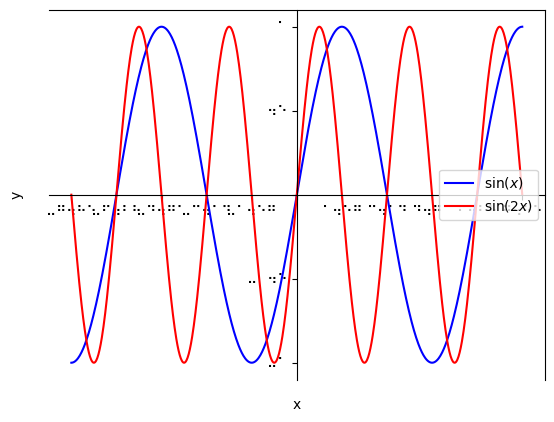

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Diccionario para convertir números en braille español (utilizando unicode braille)
braille_map = {
    '0': '\u2800', '1': '\u2801', '2': '\u2803', '3': '\u2809', '4': '\u2819', '5': '\u2811',
    '6': '\u280b', '7': '\u281b', '8': '\u2813', '9': '\u280a', '.': '\u2832', '-': '\u2824'
}

# Función para convertir un número a su representación en braille
def to_braille(num):
    return ''.join(braille_map[char] for char in str(num))

# Crear el espacio de valores para x desde -5π/2 a 5π/2
x = np.linspace(-5 * np.pi / 2, 5 * np.pi / 2, 800)

# Funciones seno y seno doble
y1 = np.sin(x)
y2 = np.sin(2 * x)

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las funciones
ax.plot(x, y1, label=r'$\sin(x)$', color='blue')
ax.plot(x, y2, label=r'$\sin(2x)$', color='red')

# Configuración de las divisiones en el eje x (divisiones de π/2)
ax.set_xticks(np.arange(-5 * np.pi / 2, 6 * np.pi / 2, np.pi / 2))
ax.set_xticklabels([to_braille(tick) for tick in [-7.85, -6.28, -4.71, -3.14, -1.57, 0, 1.57, 3.14, 4.71, 6.28, 7.85]])

# Configuración de las divisiones en el eje y (divisiones de 0.5)
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_yticklabels([to_braille(tick) for tick in [-1, -0.5, 0, 0.5, 1]])

# Mover los ejes para que estén centrados en 0,0
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Ocultar los ejes superior y derecho
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# Mover las etiquetas de los ejes al lado izquierdo e inferior, pero colocarlas afuera de los ejes
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_label_coords(1, -0.05)  # Etiqueta x afuera
ax.yaxis.set_label_coords(-0.05, 1)  # Etiqueta y afuera

# Añadir etiquetas y leyenda
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

# Guardar la gráfica en formato SVG
plt.savefig('sin_x_sin_2x_braille_outside_plot.svg', format='svg')

# Mostrar la gráfica
plt.show()


### Archived - Main Code !!!Ejecutar primero, luego si cualquiera de los graficos mas abajo

####v2

In [ ]:
# V2 (V1 is into Archive files)

import numpy as np
import matplotlib.pyplot as plt

# Conversión mm → pt
def mm2pt(mm):
    return mm * 2.83465

# Conversión mm → in
def mm2in(mm):
    return mm / 23.455555 # 25.4

# Muestreo adaptativo para colocar más/menos puntos según segmentos y densidades definidas
def muestreo_adaptativo(func, segmentos, densidades):
    puntos = []
    for (a, b), n in zip(segmentos, densidades):
        puntos.append(np.linspace(a, b, n))
    return np.concatenate(puntos)

# Función para graficar varias funciones con sus configuraciones personalizadas
def graficar_funciones(config):
    num_funciones = len(config['functions'])

    # Crear figura y ejes
    fig_w, fig_h = mm2in(config['fig_size_mm'][0]), mm2in(config['fig_size_mm'][1])
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))

    # Convertir grosores de líneas y tamaños de marcadores
    lw_grid = mm2pt(config['grid_linewidth_mm'])
    lw_axis = mm2pt(config['axis_linewidth_mm'])
    curve_lws = [mm2pt(lw) for lw in config['curve_linewidths']]
    marker_sizes = [mm2pt(sz) for sz in config['marker_sizes']]

    # Definir dominio continuo
    x_cont = np.linspace(config['xlim'][0], config['xlim'][1], 500)

    # Graficar cada función con sus curvas y marcadores
    for i in range(num_funciones):
        f = config['functions'][i]
        # Curvas continuas o discontinuas
        ax.plot(x_cont, f(x_cont), config['curve_styles'][i], linewidth=curve_lws[i], label=config['labels'][i])
        # Marcadores
        x_marks = muestreo_adaptativo(f, config['marker_segments'][i], config['marker_densities'][i])
        ax.plot(x_marks, f(x_marks), linestyle='None', marker=config['marker_shapes'][i],
                markersize=marker_sizes[i], markeredgewidth=0.2, markerfacecolor='white')

    # Configurar ticks y límites
    xticks = np.arange(config['xlim'][0], config['xlim'][1] + config['tick_step'], config['tick_step'])
    yticks = np.arange(config['ylim'][0], config['ylim'][1] + config['tick_step'], config['tick_step'])
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xlim(config['xlim'])
    ax.set_ylim(config['ylim'])

    # Dibujar ejes en 0 y cuadrícula
    ax.axhline(0, color='black', linewidth=lw_axis)
    ax.axvline(0, color='black', linewidth=lw_axis)
    ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=lw_grid)

    # Quitar etiquetas numéricas de ejes
    ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
    ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

    # Añadir marcas táctiles en los ejes
    for y in yticks:
        ax.plot([0.15, -0.15], [y, y], color='black', linewidth=lw_axis)
    for x in xticks:
        ax.plot([x, x], [0.15, -0.15], color='black', linewidth=lw_axis)

    # Ajustar márgenes y relación 1:1
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    ax.set_aspect(1)

    # Mostrar leyenda si está activado
    if config.get('show_legend', False):
        ax.legend()

    # Guardar imagen
    plt.savefig(config['output_filename'], format=config['export_format'], bbox_inches='tight')
    plt.show()

#### V1

In [ ]:
# Archived file V1

import numpy as np
import matplotlib.pyplot as plt

# Conversión mm → pt y mm → in
def mm2pt(mm):
    return mm * 2.83465

def mm2in(mm):
    return mm / 25.4

# Función generadora de muestreo adaptativo
def muestreo_adaptativo(func, segmentos, densidades):
    """
    Genera puntos de muestreo adaptativo para una función y segmentos.

    func: función evaluable (solo para validación)
    segmentos: lista de subintervalos [[a,b],...]
    densidades: lista de enteros con la cantidad de puntos por subintervalo

    Retorna: array de puntos muestreados en x
    """
    puntos = []
    for (a, b), n in zip(segmentos, densidades):
        puntos.append(np.linspace(a, b, n))
    return np.concatenate(puntos)

# Función para graficar cualquier cantidad de funciones con parámetros visualmente legibles
def graficar_funciones(config):
    """
    Grafica múltiples funciones con estilos, marcadores, muestreo adaptativo y configuración completa.

    config: diccionario con claves:
        - functions, labels, curve_styles, curve_linewidths, marker_shapes, marker_sizes,
        - marker_segments, marker_densities
        - fig_size_mm, xlim, ylim, tick_step
        - grid_linewidth_mm, axis_linewidth_mm
        - output_filename, export_format
    """
    # Crear figura
    fig_w, fig_h = mm2in(config['fig_size_mm'][0]), mm2in(config['fig_size_mm'][1])
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))

    # Grosor de líneas
    lw_grid = mm2pt(config['grid_linewidth_mm'])
    lw_axis = mm2pt(config['axis_linewidth_mm'])
    curve_lws = [mm2pt(lw) for lw in config['curve_linewidths']]
    marker_sizes = [mm2pt(sz) for sz in config['marker_sizes']]

    # Curvas continuas
    x_cont = np.linspace(config['xlim'][0], config['xlim'][1], 500)

    for i, f in enumerate(config['functions']):
        # Curva continua
        ax.plot(x_cont, f(x_cont), config['curve_styles'][i], linewidth=curve_lws[i], label=config['labels'][i])
        # Muestreo adaptativo
        x_marks = muestreo_adaptativo(f, config['marker_segments'][i], config['marker_densities'][i])
        ax.plot(x_marks, f(x_marks), linestyle='None', marker=config['marker_shapes'][i],
                markersize=marker_sizes[i], markeredgewidth=0.2, markerfacecolor='white')

    # Ticks y límites
    xticks = np.arange(config['xlim'][0], config['xlim'][1] + config['tick_step'], config['tick_step'])
    yticks = np.arange(config['ylim'][0], config['ylim'][1] + config['tick_step'], config['tick_step'])
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xlim(config['xlim'])
    ax.set_ylim(config['ylim'])

    # Ejes y cuadrícula
    ax.axhline(0, color='black', linewidth=lw_axis)
    ax.axvline(0, color='black', linewidth=lw_axis)
    ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=lw_grid)

    # Quitar etiquetas
    ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
    ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

    # Marcas de los ejes
    for y in yticks:
        ax.plot([0.15, -0.15], [y, y], color='black', linewidth=lw_axis)
    for x in xticks:
        ax.plot([x, x], [0.15, -0.15], color='black', linewidth=lw_axis)

    # Ajustes de estilo
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    ax.set_aspect(1)
    if config.get('show_legend', False):
      ax.legend()

    # Exportar
    plt.savefig(config['output_filename'], format=config['export_format'], bbox_inches='tight')
    plt.show()


### Placa B (funciones):f(x)=x,x^2,x^3

#### V2

In [ ]:
# V2 (V1 is into Archive files)

config_x_x2_x3_A4 = {
    # Funciones que se graficarán (pueden ser lambda o definidas)
    'functions': [
        lambda x: x,
        lambda x: x**2,
        lambda x: x**3
    ],

    # Etiquetas para cada curva (se muestran en la leyenda)
    'labels': ['$x$', '$x^2$', '$x^3$'],

    # Estilo de línea para cada curva
    'curve_styles': ['-', '-', '-'],

    # Grosor de línea en mm
    'curve_linewidths': [1.0, 1.3, 1.6],

    # Símbolo del marcador para cada función ('o', 's', '^', etc.)
    'marker_shapes': ['o', 's', '^'],

    # Tamaño de marcador en mm
    'marker_sizes': [3.0, 3.0, 3.5],

    # Segmentos para muestreo adaptado (más puntos donde convenga)
    'marker_segments': [
        [[-7, 7]],
        [[-7, -3], [-3, -1], [-1, 1], [1, 3], [3, 7]],
        [[-7, -3], [-3, 3], [3, 7]]
    ],

    # Densidad de puntos por segmento
    'marker_densities': [
        [35],
        [2, 8, 8, 8, 2],
        [5, 15, 5]
    ],

    # Dimensiones de la figura en mm (ancho, alto)
    'fig_size_mm': (200, 200), # A4 -> 297 x 210 mm

    # Límites de los ejes (xmin, xmax), (ymin, ymax)
    'xlim': (-7, 7),
    'ylim': (-7, 7),

    # Paso entre divisiones de los ejes
    'tick_step': 0.5,

    # Grosor de líneas de cuadrícula en mm
    'grid_linewidth_mm': 0.25,

    # Grosor de ejes en mm
    'axis_linewidth_mm': 0.6,

    # Nombre del archivo de salida
    'output_filename': 'x_x2_x3_A4_V1_grafica_tactil_Collab.svg',

    # Formato de exportación (svg, png, pdf…)
    'export_format': 'svg',

    # Mostrar leyenda o no (True/False)
    'show_legend': False
}

#### V1

In [ ]:
# Archived file V1

config_x_x2_x3 = {
    'functions': [
        lambda x: x,
        lambda x: x**2,
        lambda x: np.sin(x)
    ],
    'labels': ['$x$', '$x^2$', '$\\sin(x)$'],
    'curve_styles': ['-', '--', '-.'],
    'curve_linewidths': [1.0, 1.3, 1.6],
    'marker_shapes': ['o', 's', '^'],
    'marker_sizes': [3.0, 3.0, 3.5],
    'marker_segments': [
        [[-7, 7]],
        [[-7, -3], [-3, -1], [-1, 1], [1, 3], [3, 7]],
        [[-7, -3], [-3, 3], [3, 7]]
    ],
    'marker_densities': [
        [35],
        [2, 8, 8, 8, 2],
        [5, 15, 5]
    ],
    'fig_size_mm': (168, 168),
    'xlim': (-7, 7),
    'ylim': (-7, 7),
    'tick_step': 0.5,
    'grid_linewidth_mm': 0.25,
    'axis_linewidth_mm': 0.6,
    'show_legend': False,
    'output_filename': 'grafico_personalizado.svg',
    'export_format': 'svg'
}


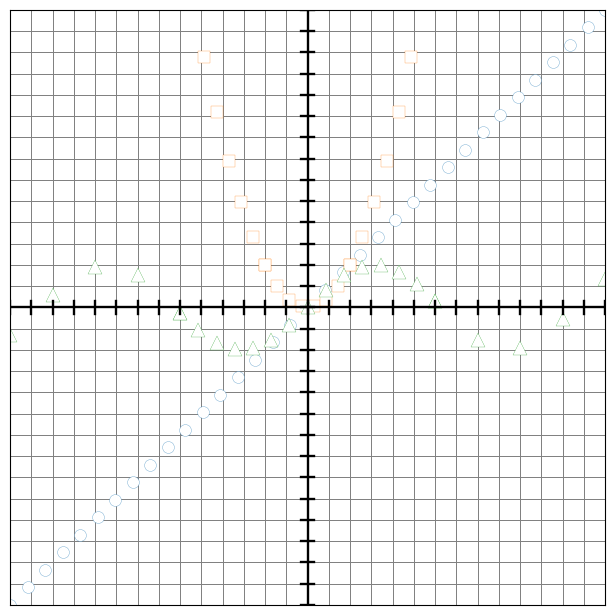

In [ ]:
graficar_funciones(config_x_x2_x3)

### Placa B (funciones): f(x) =x,  x², x³



V8

In [ ]:
config = {
    'functions': [
        lambda x: x,
        lambda x: x**2,
        lambda x: np.sin(x)
    ],
    'labels': ['$x$', '$x^2$', '$\\sin(x)$'],
    'curve_styles': ['-', '--', '-.'],
    'curve_linewidths': [1.0, 1.3, 1.6],
    'marker_shapes': ['o', 's', '^'],
    'marker_sizes': [3.0, 3.0, 3.5],
    'marker_segments': [
        [[-7, 7]],
        [[-7, -3], [-3, -1], [-1, 1], [1, 3], [3, 7]],
        [[-7, -3], [-3, 3], [3, 7]]
    ],
    'marker_densities': [
        [35],
        [2, 8, 8, 8, 2],
        [5, 15, 5]
    ],
    'fig_size_mm': (168, 168),
    'xlim': (-7, 7),
    'ylim': (-7, 7),
    'tick_step': 0.5,
    'grid_linewidth_mm': 0.25,
    'axis_linewidth_mm': 0.6,
    'show_legend': False,
    'output_filename': 'grafico_personalizado.svg',
    'export_format': 'svg'
}


Ingreso de parametros config

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Conversión mm → pt y mm → in
def mm2pt(mm):
    return mm * 2.83465

def mm2in(mm):
    return mm / 25.4

# Función generadora de muestreo adaptativo
def muestreo_adaptativo(func, segmentos, densidades):
    """
    Genera puntos de muestreo adaptativo para una función y segmentos.

    func: función evaluable (solo para validación)
    segmentos: lista de subintervalos [[a,b],...]
    densidades: lista de enteros con la cantidad de puntos por subintervalo

    Retorna: array de puntos muestreados en x
    """
    puntos = []
    for (a, b), n in zip(segmentos, densidades):
        puntos.append(np.linspace(a, b, n))
    return np.concatenate(puntos)

# Función para graficar cualquier cantidad de funciones con parámetros visualmente legibles
def graficar_funciones(config):
    """
    Grafica múltiples funciones con estilos, marcadores, muestreo adaptativo y configuración completa.

    config: diccionario con claves:
        - functions, labels, curve_styles, curve_linewidths, marker_shapes, marker_sizes,
        - marker_segments, marker_densities
        - fig_size_mm, xlim, ylim, tick_step
        - grid_linewidth_mm, axis_linewidth_mm
        - output_filename, export_format
    """
    # Crear figura
    fig_w, fig_h = mm2in(config['fig_size_mm'][0]), mm2in(config['fig_size_mm'][1])
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))

    # Grosor de líneas
    lw_grid = mm2pt(config['grid_linewidth_mm'])
    lw_axis = mm2pt(config['axis_linewidth_mm'])
    curve_lws = [mm2pt(lw) for lw in config['curve_linewidths']]
    marker_sizes = [mm2pt(sz) for sz in config['marker_sizes']]

    # Curvas continuas
    x_cont = np.linspace(config['xlim'][0], config['xlim'][1], 500)

    for i, f in enumerate(config['functions']):
        # Curva continua
        ax.plot(x_cont, f(x_cont), config['curve_styles'][i], linewidth=curve_lws[i], label=config['labels'][i])
        # Muestreo adaptativo
        x_marks = muestreo_adaptativo(f, config['marker_segments'][i], config['marker_densities'][i])
        ax.plot(x_marks, f(x_marks), linestyle='None', marker=config['marker_shapes'][i],
                markersize=marker_sizes[i], markeredgewidth=0.2, markerfacecolor='white')

    # Ticks y límites
    xticks = np.arange(config['xlim'][0], config['xlim'][1] + config['tick_step'], config['tick_step'])
    yticks = np.arange(config['ylim'][0], config['ylim'][1] + config['tick_step'], config['tick_step'])
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xlim(config['xlim'])
    ax.set_ylim(config['ylim'])

    # Ejes y cuadrícula
    ax.axhline(0, color='black', linewidth=lw_axis)
    ax.axvline(0, color='black', linewidth=lw_axis)
    ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=lw_grid)

    # Quitar etiquetas
    ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
    ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

    # Marcas de los ejes
    for y in yticks:
        ax.plot([0.15, -0.15], [y, y], color='black', linewidth=lw_axis)
    for x in xticks:
        ax.plot([x, x], [0.15, -0.15], color='black', linewidth=lw_axis)

    # Ajustes de estilo
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    ax.set_aspect(1)
    if config.get('show_legend', False):
      ax.legend()

    # Exportar
    plt.savefig(config['output_filename'], format=config['export_format'], bbox_inches='tight')
    plt.show()


Llamar la grafica con config 1

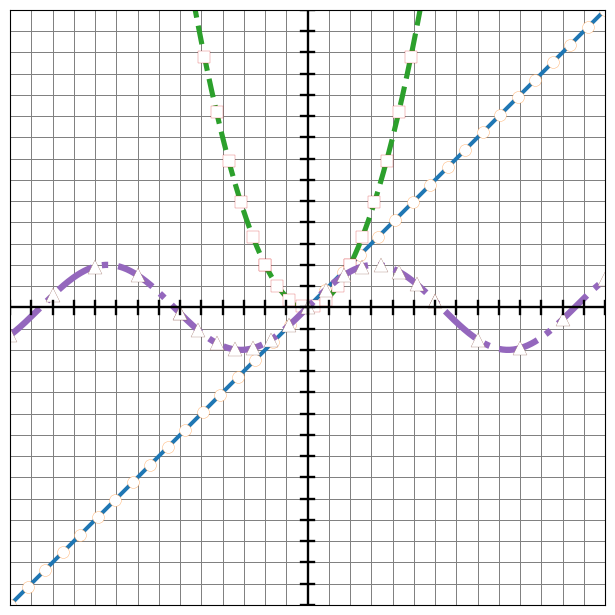

In [ ]:
graficar_funciones(config)

v7

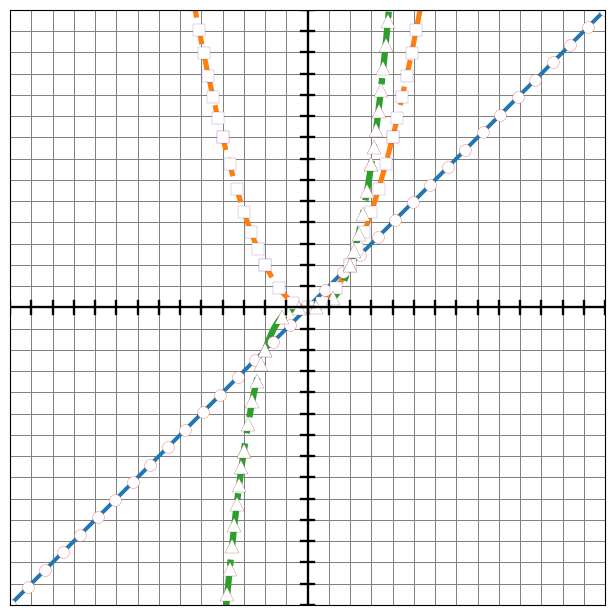

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Conversión mm → pt y mm → in
def mm2pt(mm):
    return mm * 2.83465

def mm2in(mm):
    return mm / 25.4

# Muestreo adaptativo
def muestreo_adaptativo(segmentos, densidades):
    puntos = []
    for (a, b), n_puntos in zip(segmentos, densidades):
        puntos.append(np.linspace(a, b, n_puntos))
    return np.concatenate(puntos)

# Gráfica automática con parámetros visualmente ordenados
def graficar_funciones(params):
    # Preparar figura
    fig_w_in, fig_h_in = mm2in(params['fig_size_mm'][0]), mm2in(params['fig_size_mm'][1])
    fig, ax = plt.subplots(figsize=(fig_w_in, fig_h_in))

    # Líneas
    lw_grid = mm2pt(params['grid_linewidth_mm'])
    lw_axis = mm2pt(params['axis_linewidth_mm'])
    curve_lws = [mm2pt(lw) for lw in params['curve_linewidths_mm']]
    marker_sizes_pt = [mm2pt(sz) for sz in params['marker_sizes_mm']]

    # Dominio continuo para curvas
    x_cont = np.linspace(params['xlim'][0], params['xlim'][1], 500)

    # Curvas continuas
    for i, f in enumerate(params['functions']):
        ax.plot(x_cont, f(x_cont), params['curve_styles'][i], linewidth=curve_lws[i], label=params['labels'][i])

    # Marcadores adaptativos
    for i, f in enumerate(params['functions']):
        x_marks = muestreo_adaptativo(params['marker_segments'][i], params['marker_densities'][i])
        ax.plot(x_marks, f(x_marks), linestyle='None', marker=params['marker_shapes'][i],
                markersize=marker_sizes_pt[i], markeredgewidth=0.2, markerfacecolor='white')

    # Divisiones y límites de ejes
    xticks = np.arange(params['xlim'][0], params['xlim'][1] + params['tick_step'], params['tick_step'])
    yticks = np.arange(params['ylim'][0], params['ylim'][1] + params['tick_step'], params['tick_step'])
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xlim(params['xlim'])
    ax.set_ylim(params['ylim'])

    # Ejes principales y cuadrícula
    ax.axhline(0, color='black', linewidth=lw_axis)
    ax.axvline(0, color='black', linewidth=lw_axis)
    ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=lw_grid)

    # Ocultar etiquetas
    ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
    ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

    # Marcas en ejes
    for y in yticks:
        ax.plot([0.15, -0.15], [y, y], color='black', linewidth=lw_axis)
    for x in xticks:
        ax.plot([x, x], [0.15, -0.15], color='black', linewidth=lw_axis)

    # Ajuste márgenes y aspecto
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    ax.set_aspect(1)

    # Exportar y mostrar
    plt.savefig(params['output_filename'], format=params['export_format'], bbox_inches='tight')
    plt.show()

# Ejemplo de configuración con visualización clara
def ejemplo_parametros():
    return {
        'functions':       [lambda x: x, lambda x: x**2, lambda x: x**3],
        'labels':          ['$x$', '$x^2$', '$x^3$'],
        'curve_styles':    ['-', '--', '-.'],
        'curve_linewidths_mm': [1.0, 1.3, 1.6],
        'marker_shapes':   ['o', 's', '^'],
        'marker_sizes_mm': [3.0, 3.0, 3.8],
        'marker_segments': [
            [[-7, 7]],
            [[-7, -3], [-3, -2], [-2, -1], [-1, 1], [1, 2], [2, 3], [3, 7]],
            [[-7, -2], [-2, -1.5], [-1.5, -1], [-1, 1], [1, 1.5], [1.5, 2], [2, 7]]
        ],
        'marker_densities': [
            [35],
            [1, 10, 7, 7, 7, 10, 1],
            [1, 10, 6, 6, 6, 10, 1]
        ],
        'fig_size_mm':     (168, 168),
        'xlim':            (-7, 7),
        'ylim':            (-7, 7),
        'tick_step':       0.5,
        'grid_linewidth_mm': 0.25,
        'axis_linewidth_mm': 0.6,
        'export_format':   'svg',
        'output_filename': 'grafica_tactil.svg'
    }

# Para probar directamente:
graficar_funciones(ejemplo_parametros())

v6

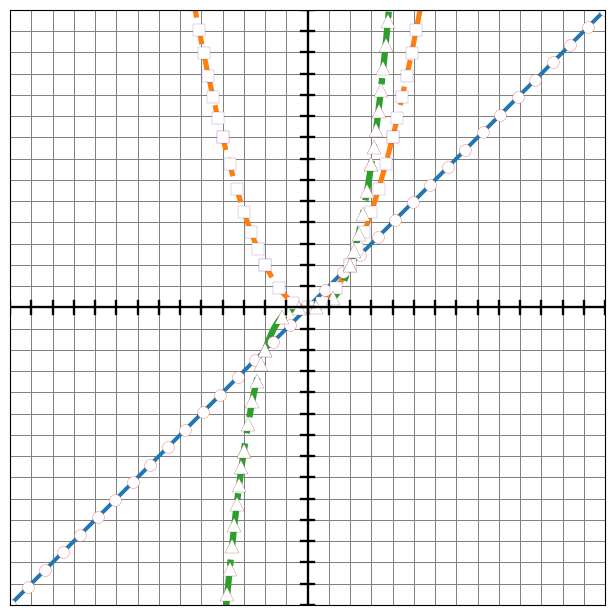

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Conversión mm → pt y mm → in
def mm2pt(mm):
    return mm * 2.83465

def mm2in(mm):
    return mm / 25.4

# Función generadora de muestreo adaptativo
def muestreo_adaptativo(func, x_min, x_max, segmentos, densidades):
    """
    Genera puntos de muestreo adaptativo.

    func        : función evaluable
    x_min, x_max: dominio de la función
    segmentos   : lista de pares [a, b] delimitando subintervalos
    densidades  : cantidad de puntos por cada subintervalo

    Retorna: array de puntos muestreados en x
    """
    puntos = []
    for (a, b), n_puntos in zip(segmentos, densidades):
        puntos.append(np.linspace(a, b, n_puntos))
    return np.concatenate(puntos)

# Dominio continuo
x_cont = np.linspace(-7, 7, 500)

# Dimensiones marcadores en pt
d_circ = mm2pt(3.0)
a_cuad = mm2pt(3.0)
b_tri  = mm2pt(3.8)

# Tamaño gráfico en pulgadas
fig_w_in = mm2in(168)
fig_h_in = mm2in(168)
fig, ax = plt.subplots(figsize=(fig_w_in, fig_h_in))

# Grosor de líneas en pt
lw1 = mm2pt(0.25)
lw2 = mm2pt(0.6)
lw3 = mm2pt(1.0)
lw4 = mm2pt(1.3)
lw5 = mm2pt(1.6)

# Curvas continuas
ax.plot(x_cont, x_cont, '-',  linewidth=lw3, label='$x$')
ax.plot(x_cont, x_cont**2, '--', linewidth=lw4, label='$x^2$')
ax.plot(x_cont, x_cont**3, '-.', linewidth=lw5, label='$x^3$')

# Definir segmentos y densidades personalizadas
seg_x = [[-7, 7]]
pts_x = [35]

seg_x2 = [[-7, -3], [-3, -2], [-2, -1], [-1, 1], [1, 2], [2, 3], [3, 7]]
pts_x2 = [1, 10, 7, 7, 7, 10, 1]

seg_x3 = [[-7, -2], [-2, -1.5], [-1.5, -1], [-1, 1], [1, 1.5], [1.5, 2], [2, 7]]
pts_x3 = [1, 10, 6, 6, 6, 10, 1]

# Generar muestreos adaptativos
x_marcadores_1 = muestreo_adaptativo(lambda x: x, -7, 7, seg_x, pts_x)
x_marcadores_2 = muestreo_adaptativo(lambda x: x**2, -7, 7, seg_x2, pts_x2)
x_marcadores_3 = muestreo_adaptativo(lambda x: x**3, -7, 7, seg_x3, pts_x3)

# Dibujar marcadores
ax.plot(x_marcadores_1, x_marcadores_1, linestyle='None', marker='o', markersize=d_circ, markeredgewidth=0.2, markerfacecolor='white')
ax.plot(x_marcadores_2, x_marcadores_2**2, linestyle='None', marker='s', markersize=a_cuad, markeredgewidth=0.2, markerfacecolor='white')
ax.plot(x_marcadores_3, x_marcadores_3**3, linestyle='None', marker='^', markersize=b_tri, markeredgewidth=0.2, markerfacecolor='white')

# Definir divisiones y límites de ejes
xticks = np.arange(-7, 7.5, 0.5)
yticks = np.arange(-7, 7.5, 0.5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)

# Ejes en 0
ax.axhline(0, color='black', linewidth=lw2)
ax.axvline(0, color='black', linewidth=lw2)

# Cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=lw1)

# Ocultar etiquetas de ejes
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Marcas en los ejes
for y in np.arange(-7, 7.5, 0.5):
    ax.plot([0.15, -0.15], [y, y], color='black', linewidth=lw2)
for x in np.arange(-7, 7.5, 0.5):
    ax.plot([x, x], [0.15, -0.15], color='black', linewidth=lw2)

# Márgenes y aspecto
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
ax.set_aspect(1)

# Guardar SVG
plt.savefig('x_x2_x3_tactil_adaptativo_funcion.svg', format='svg', bbox_inches='tight')

# Mostrar
plt.show()

v5

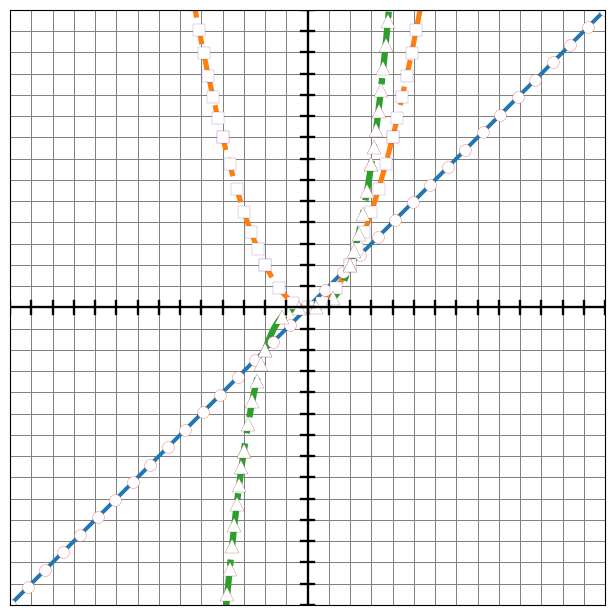

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función conversión mm → pt y mm → in
def mm2pt(mm):
    return mm * 2.83465
def mm2in(mm):
    return mm / 25.4

# Dominio continuo para las curvas
x_cont = np.linspace(-7, 7, 500)

# Dimensiones de los marcadores en pt
d_circ = mm2pt(3.0)
a_cuad = mm2pt(3.0)
b_tri  = mm2pt(3.8)

# Tamaño del gráfico en pulgadas
fig_w_in = mm2in(168)
fig_h_in = mm2in(168)

fig, ax = plt.subplots(figsize=(fig_w_in, fig_h_in))

# Grosor de líneas en pt
linewidth_mm_to_pt_1 = mm2pt(0.25)
linewidth_mm_to_pt_2 = mm2pt(0.6)
linewidth_mm_to_pt_3 = mm2pt(1.0)
linewidth_mm_to_pt_4 = mm2pt(1.3)
linewidth_mm_to_pt_5 = mm2pt(1.6)

# Curvas continuas
ax.plot(x_cont, x_cont, '-', linewidth=linewidth_mm_to_pt_3, label='$x$')
ax.plot(x_cont, x_cont**2, '--', linewidth=linewidth_mm_to_pt_4, label='$x^2$')
ax.plot(x_cont, x_cont**3, '-.', linewidth=linewidth_mm_to_pt_5, label='$x^3$')

# Muestreo adaptado para marcadores:

# Para f(x)=x → distribución uniforme
x_marcadores_1 = np.linspace(-7, 7, 35)

# Para f(x)=x^2 → más puntos cerca de 0 donde varía menos
x_marcadores_2 = np.concatenate([
    np.linspace(-7.0, -3.0, 1),
    np.linspace(-3.0, -2.0, 10),
    np.linspace(-2.0, -1.0, 7),
    np.linspace(-1.0,  1.0, 7),
    np.linspace(1.0, 2.0, 7),
    np.linspace(2.0, 3.0, 10),
    np.linspace(3.0, 7.0, 1)
])

# Para f(x)=x^3 → muy pocos en los extremos, más cerca de 0
x_marcadores_3 = np.concatenate([
    np.linspace(-7.0, -2.0, 1),
    np.linspace(-2.0, -1.5, 10),
    np.linspace(-1.5, -1.0, 6),
    np.linspace(-1.0,  1.0, 6),
    np.linspace(1.0, 1.5, 6),
    np.linspace(1.5, 2.0, 10),
    np.linspace(2.0, 7.0, 1)
])

# Dibujar marcadores
ax.plot(x_marcadores_1, x_marcadores_1, linestyle='None', marker='o', markersize=d_circ, markeredgewidth=0.2, markerfacecolor='white')
ax.plot(x_marcadores_2, x_marcadores_2**2, linestyle='None', marker='s', markersize=a_cuad, markeredgewidth=0.2, markerfacecolor='white')
ax.plot(x_marcadores_3, x_marcadores_3**3, linestyle='None', marker='^', markersize=b_tri, markeredgewidth=0.2, markerfacecolor='white')

# Definir divisiones y límites de ejes
xticks = np.arange(-7, 7.5, 0.5)
yticks = np.arange(-7, 7.5, 0.5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)

# Ejes en 0
ax.axhline(0, color='black', linewidth=linewidth_mm_to_pt_2)
ax.axvline(0, color='black', linewidth=linewidth_mm_to_pt_2)

# Cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_mm_to_pt_1)

# Ocultar etiquetas de ejes
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Marcas en los ejes
for y in np.arange(-7, 7.5, 0.5):
    ax.plot([0.15, -0.15], [y, y], color='black', linewidth=linewidth_mm_to_pt_2)
for x in np.arange(-7, 7.5, 0.5):
    ax.plot([x, x], [0.15, -0.15], color='black', linewidth=linewidth_mm_to_pt_2)

# Márgenes
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Relación de aspecto 1:1
ax.set_aspect(1)

# Guardar SVG
plt.savefig('x_x2_x3_tactil_adaptativo.svg', format='svg', bbox_inches='tight')

# Mostrar gráfica
plt.show()

v4

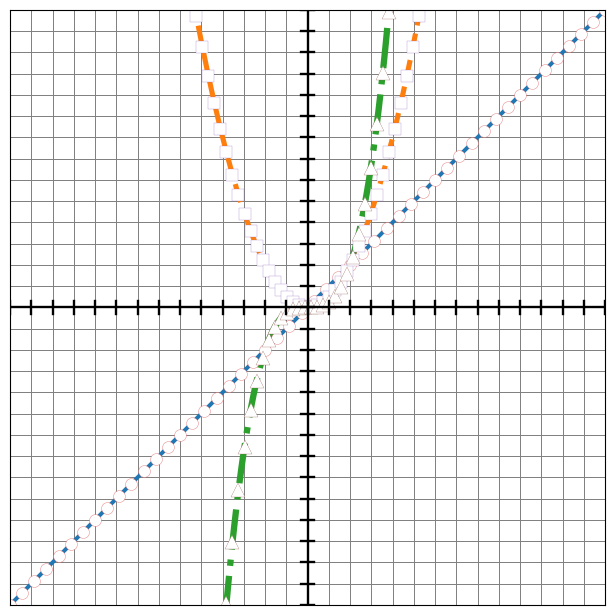

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Conversión mm → pt y mm → in
def mm2pt(mm):
    return mm * 2.83465

def mm2in(mm):
    return mm / 25.4

# Dominio continuo para las curvas
x_cont = np.linspace(-7, 7, 500)

# Dominio de los marcadores individuales
x_marcadores_1 = np.linspace(-7, 7, 50)  # f(x)=x
x_marcadores_2 = np.linspace(-7, 7, 100)  # f(x)=x^2
x_marcadores_3 = np.linspace(-7, 7, 100)  # f(x)=x^3

# Dimensiones de los marcadores en pt
d_circ = mm2pt(3.0)
a_cuad = mm2pt(3.0)
b_tri  = mm2pt(3.8)

# Tamaño del gráfico en pulgadas
fig_w_in = mm2in(168)
fig_h_in = mm2in(168)

fig, ax = plt.subplots(figsize=(fig_w_in, fig_h_in))

# Grosor de líneas en pt
linewidth_mm_to_pt_1 = mm2pt(0.25)
linewidth_mm_to_pt_2 = mm2pt(0.6)
linewidth_mm_to_pt_3 = mm2pt(1.0)
linewidth_mm_to_pt_4 = mm2pt(1.3)
linewidth_mm_to_pt_5 = mm2pt(1.6)

# Curvas continuas
ax.plot(x_cont, x_cont, '-', linewidth=linewidth_mm_to_pt_3, label='$x$')
ax.plot(x_cont, x_cont**2, '--', linewidth=linewidth_mm_to_pt_4, label='$x^2$')
ax.plot(x_cont, x_cont**3, '-.', linewidth=linewidth_mm_to_pt_5, label='$x^3$')

# Marcadores individualmente
ax.plot(x_marcadores_1, x_marcadores_1, linestyle='None', marker='o', markersize=d_circ,
        markeredgewidth=0.2, markerfacecolor='white')
ax.plot(x_marcadores_2, x_marcadores_2**2, linestyle='None', marker='s', markersize=a_cuad,
        markeredgewidth=0.2, markerfacecolor='white')
ax.plot(x_marcadores_3, x_marcadores_3**3, linestyle='None', marker='^', markersize=b_tri,
        markeredgewidth=0.2, markerfacecolor='white')

# Definir divisiones y límites de ejes
xticks = np.arange(-7, 7.5, 0.5)
yticks = np.arange(-7, 7.5, 0.5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)

# Añadir ejes X y Y en 0
ax.axhline(0, color='black', linewidth=linewidth_mm_to_pt_2)
ax.axvline(0, color='black', linewidth=linewidth_mm_to_pt_2)

# Cuadrícula personalizada
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_mm_to_pt_1)

# Ocultar etiquetas de ejes
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Marcas en los ejes
for y in np.arange(-7, 7.5, 0.5):
    ax.plot([0.15, -0.15], [y, y], color='black', linewidth=linewidth_mm_to_pt_2)
for x in np.arange(-7, 7.5, 0.5):
    ax.plot([x, x], [0.15, -0.15], color='black', linewidth=linewidth_mm_to_pt_2)

# Márgenes
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Relación de aspecto 1:1
ax.set_aspect(1)

# Guardar SVG
plt.savefig('x_x2_x3_tactil_individual.svg', format='svg', bbox_inches='tight')

# Mostrar gráfica
plt.show()

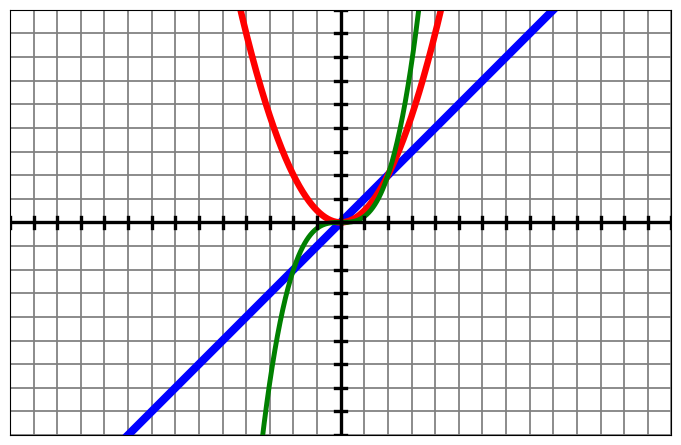

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-7, 7, 1000)

# Definir las funciones
y1 = x
y2 = x**2
y3 = x**3

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 168 + 40 # Ancho deseado en mm, Considera sumar 40 mm si quieres que te de la medida en los bordes
height_mm = 102 + 40 # Altura deseada en mm, considera sumar 40 mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mmk
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion x
linewidth_mm_4 = 1.65  # Grosor en mm para la funcion x^2
linewidth_mm_5 = 2.05  # Grosor en mm para la funcion x^3
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos
linewidth_pt_5 = linewidth_mm_5 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$x$', color='blue', linestyle='-', linewidth=linewidth_pt_5)
ax.plot(x, y2, label=r'$x^2$', color='red', linestyle='-', linewidth=linewidth_pt_4)
ax.plot(x, y3, label=r'$x^3$', color='green', linestyle='-', linewidth=linewidth_pt_3)

# Divisiones en el eje x en múltiplos de 1
xticks = np.arange(-7.0, 7.5, 0.5)
ax.set_xticks(xticks)

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-4.5, 5.0, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -4 hasta 4
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -4 hasta 4

# Ocultar los ejes superior y derecho
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# Dibujar marcas adicionales en los ejes
for y in np.arange(-4.5, 5.0, 0.5):  # Marcas en el eje y
    ax.plot([0.12, -0.12], [y, y], color='black', linewidth=linewidth_pt_2)

for x in np.arange(-7.0, 7.5, 0.5):  # Marcas en el eje x
    ax.plot([x, x], [0.12, -0.12], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('x_x^2_x^3_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


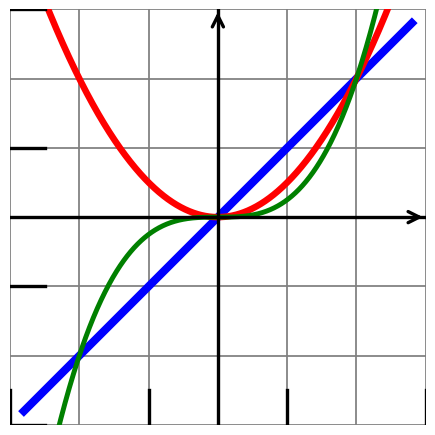

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-1.4, 1.4, 1000)

# Definir las funciones
y1 = x
y2 = x**2
y3 = x**3

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 174 + 30  # Ancho deseado en mm, Considera sumar 30 mm si quieres que te de la medida en los bordes
height_mm = 132  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion x
linewidth_mm_4 = 1.65  # Grosor en mm para la funcion x^2
linewidth_mm_5 = 2.05  # Grosor en mm para la funcion x^3
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos
linewidth_pt_5 = linewidth_mm_5 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$x$', color='blue', linestyle='-', linewidth=linewidth_pt_5)
ax.plot(x, y2, label=r'$x^2$', color='red', linestyle='-', linewidth=linewidth_pt_4)
ax.plot(x, y3, label=r'$x^3$', color='green', linestyle='-', linewidth=linewidth_pt_3)

# Divisiones en el eje x en múltiplos de 1
xticks = np.arange(-1.5, 2.0, 0.5)
ax.set_xticks(xticks)

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-1.5, 2.0, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -4 hasta 4
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -4 hasta 4

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(1.5 , 0), xytext=(1.4, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 1.5), xytext=(0, 1.4),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-1.5, 2.0, 1.0):  # Marcas en el eje y
    ax.plot([-1.25, -1.5], [y, y], color='black', linewidth=linewidth_pt_2)

for x in np.arange(-1.5, 2.0, 1.0):  # Marcas en el eje x
    ax.plot([x, x], [-1.25, -1.5], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('zoom_x_x^2_x^3_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


### Placa B1 (funciones): f(x) =x,  x², x³



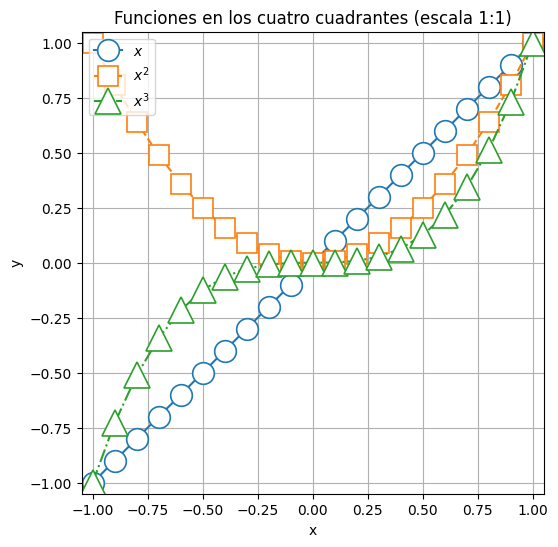

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 21)
y1, y2, y3 = x, x**2, x**3

def mm2pt(mm):
    return mm * 2.83465

d_circ = mm2pt(5.5)
a_cuad = mm2pt(5.0)
b_tri  = mm2pt(6.4)

plt.figure(figsize=(6, 6))
plt.plot(x, y1, '-',  marker='o', markersize=d_circ, markeredgewidth=1.2,
         markerfacecolor='white', label='$x$')
plt.plot(x, y2, '--', marker='s', markersize=a_cuad, markeredgewidth=1.2,
         markerfacecolor='white', label='$x^2$')
plt.plot(x, y3, '-.', marker='^', markersize=b_tri, markeredgewidth=1.2,
         markerfacecolor='white', label='$x^3$')

plt.gca().set_aspect('equal', 'box')
plt.xlim(-1.05, 1.05)
plt.ylim(-1.05, 1.05)
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Funciones en los cuatro cuadrantes (escala 1:1)')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

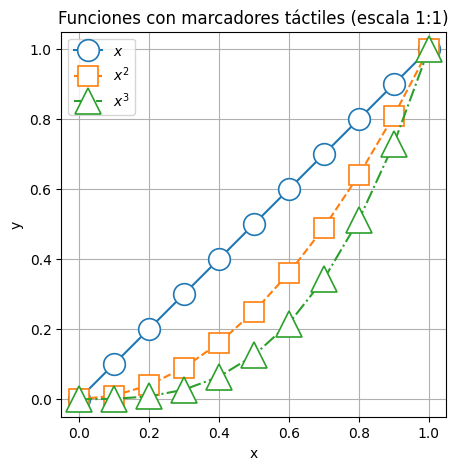

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones y muestreo
x = np.linspace(0, 1, 11)
y1, y2, y3 = x, x**2, x**3

# Conversión mm → puntos (1 mm ≈ 2.83465 pt)
def mm2pt(mm):
    return mm * 2.83465

# Dimensiones de las formas
d_circ = mm2pt(5.5)  # círculo
a_cuad = mm2pt(5.0)  # cuadrado
b_tri  = mm2pt(6.4)  # triángulo

plt.figure(figsize=(5, 5))
plt.plot(x, y1, '-',  marker='o', markersize=d_circ, markeredgewidth=1.2,
         markerfacecolor='white', label='$x$')
plt.plot(x, y2, '--', marker='s', markersize=a_cuad, markeredgewidth=1.2,
         markerfacecolor='white', label='$x^2$')
plt.plot(x, y3, '-.', marker='^', markersize=b_tri, markeredgewidth=1.2,
         markerfacecolor='white', label='$x^3$')

plt.gca().set_aspect('equal', 'box')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Funciones con marcadores táctiles (escala 1:1)')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

v3

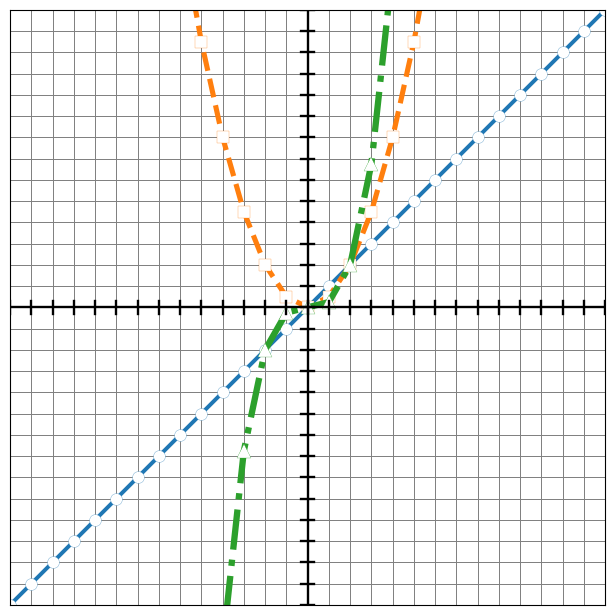

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función de conversión mm → pt y mm → in
def mm2pt(mm):
    return mm * 2.83465

def mm2in(mm):
    return mm / 25.4

# Dominio de las funciones
x = np.arange(-7, 7.1, 0.5)
y1, y2, y3 = x, x**2, x**3

# Dimensiones de los marcadores en pt
d_circ = mm2pt(3.0)
a_cuad = mm2pt(3.0)
b_tri  = mm2pt(3.8)

# Tamaño del gráfico en pulgadas
fig_w_in = mm2in(168)
fig_h_in = mm2in(168)

fig, ax = plt.subplots(figsize=(fig_w_in, fig_h_in))

# Grosor de líneas en pt
linewidth_mm_to_pt_1 = mm2pt(0.25)
linewidth_mm_to_pt_2 = mm2pt(0.6)
linewidth_mm_to_pt_3 = mm2pt(1.0)
linewidth_mm_to_pt_4 = mm2pt(1.3)
linewidth_mm_to_pt_5 = mm2pt(1.6)

# Graficar las funciones con marcadores
ax.plot(x, y1, '-', marker='o', markersize=d_circ, markeredgewidth=0.2, markerfacecolor='white', linewidth=linewidth_mm_to_pt_3, label='$x$')
ax.plot(x, y2, '--', marker='s', markersize=a_cuad, markeredgewidth=0.2, markerfacecolor='white', linewidth=linewidth_mm_to_pt_4, label='$x^2$')
ax.plot(x, y3, '-.', marker='^', markersize=b_tri, markeredgewidth=0.2, markerfacecolor='white', linewidth=linewidth_mm_to_pt_5, label='$x^3$')

# Definir divisiones y límites de ejes
xticks = np.arange(-7, 7.5, 0.5)
yticks = np.arange(-7, 7.5, 0.5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)

# Añadir ejes X y Y en 0
ax.axhline(0, color='black', linewidth=linewidth_mm_to_pt_2)
ax.axvline(0, color='black', linewidth=linewidth_mm_to_pt_2)

# Cuadrícula personalizada
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_mm_to_pt_1)

# Ocultar etiquetas de ejes
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Marcas en los ejes
for y in np.arange(-7, 7.5, 0.5):
    ax.plot([0.15, -0.15], [y, y], color='black', linewidth=linewidth_mm_to_pt_2)
for x in np.arange(-7, 7.5, 0.5):
    ax.plot([x, x], [0.15, -0.15], color='black', linewidth=linewidth_mm_to_pt_2)

# Márgenes
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Relación de aspecto 1:1
ax.set_aspect(1)

# Guardar SVG
plt.savefig('x_x2_x3_tactil.svg', format='svg', bbox_inches='tight')

# Mostrar gráfica
plt.show()


v2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
#x = np.linspace(-1, 1, 10)
x = np.arange(-1, 1, 0.2)

# Definir las funciones
y1 = x
y2 = x**2
y3 = x**3


def mm2pt(mm):
    return mm * 2.83465

d_circ = mm2pt(5.5)
a_cuad = mm2pt(5.0)
b_tri  = mm2pt(6.4)



# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm_to_pt = mm2pt(168) # Ancho deseado en mm, Considera sumar 40 mm si quieres que te de la medida en los bordes
height_mm_to_pt = mm2pt(102) # Altura deseada en mm, considera sumar 40 mm


# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_mm_to_pt, height_mm_to_pt))

# Control de grosor de las líneas en mmk
linewidth_mm_to_pt_1 = mm2pt(0.45)  # Grosor en mm para la cuadrícula
linewidth_mm_to_pt_2 = mm2pt(0.85)  # Grosor en mm para los ejes
linewidth_mm_to_pt_3 = mm2pt(1.25)  # Grosor en mm para la funcion x
linewidth_mm_to_pt_4 = mm2pt(1.65)  # Grosor en mm para la funcion x^2
linewidth_mm_to_pt_5 = mm2pt(2.05)  # Grosor en mm para la funcion x^3


ax.plot(x, y1, '-',  marker='o', markersize=d_circ, markeredgewidth=0.2,
         markerfacecolor='white', label='$x$')
ax.plot(x, y2, '--', marker='s', markersize=a_cuad, markeredgewidth=0.2,
         markerfacecolor='white', label='$x^2$')
ax.plot(x, y3, '-.', marker='^', markersize=b_tri, markeredgewidth=0.2,
         markerfacecolor='white', label='$x^3$')

# Divisiones en el eje x en múltiplos de 1
xticks = np.arange(-1.0, 1.5, 0.5)
ax.set_xticks(xticks)

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-1.5, 1.0, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_mm_to_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_mm_to_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_mm_to_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -4 hasta 4
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -4 hasta 4

# Dibujar marcas adicionales en los ejes
for y in np.arange(-4.5, 5.0, 0.5):  # Marcas en el eje y
    ax.plot([0.12, -0.12], [y, y], color='black', linewidth=linewidth_mm_to_pt_2)

for x in np.arange(-7.0, 7.5, 0.5):  # Marcas en el eje x
    ax.plot([x, x], [0.12, -0.12], color='black', linewidth=linewidth_mm_to_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('x_x^2_x^3_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


v1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
#x = np.linspace(-1, 1, 10)
x = np.arange(-1, 1, 0.2)

# Definir las funciones
y1 = x
y2 = x**2
y3 = x**3


def mm2pt(mm):
    return mm * 2.83465

d_circ = mm2pt(5.5)
a_cuad = mm2pt(5.0)
b_tri  = mm2pt(6.4)



# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm_to_pt = mm2pt(168) # Ancho deseado en mm, Considera sumar 40 mm si quieres que te de la medida en los bordes
height_mm_to_pt = mm2pt(102) # Altura deseada en mm, considera sumar 40 mm


# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_mm_to_pt, height_mm_to_pt))

# Control de grosor de las líneas en mmk
linewidth_mm_to_pt_1 = mm2pt(0.45)  # Grosor en mm para la cuadrícula
linewidth_mm_to_pt_2 = mm2pt(0.85)  # Grosor en mm para los ejes
linewidth_mm_to_pt_3 = mm2pt(1.25)  # Grosor en mm para la funcion x
linewidth_mm_to_pt_4 = mm2pt(1.65)  # Grosor en mm para la funcion x^2
linewidth_mm_to_pt_5 = mm2pt(2.05)  # Grosor en mm para la funcion x^3

# Graficar las funciones
#ax.plot(x, y1, label=r'$x$', color='blue', linestyle='-', linewidth=linewidth_mm_to_pt_5)
#ax.plot(x, y2, label=r'$x^2$', color='red', linestyle='-', linewidth=linewidth_mm_to_pt_4)
#ax.plot(x, y3, label=r'$x^3$', color='green', linestyle='-', linewidth=linewidth_mm_to_pt_3)

ax.plot(x, y1, '-',  marker='o', markersize=d_circ, markeredgewidth=1.2,
         markerfacecolor='white', label='$x$')
ax.plot(x, y2, '--', marker='s', markersize=a_cuad, markeredgewidth=1.2,
         markerfacecolor='white', label='$x^2$')
ax.plot(x, y3, '-.', marker='^', markersize=b_tri, markeredgewidth=1.2,
         markerfacecolor='white', label='$x^3$')

# Divisiones en el eje x en múltiplos de 1
xticks = np.arange(-1.0, 1.5, 0.5)
ax.set_xticks(xticks)

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-1.5, 1.0, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_mm_to_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_mm_to_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_mm_to_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -4 hasta 4
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -4 hasta 4

# Ocultar los ejes superior y derecho
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# Dibujar marcas adicionales en los ejes
for y in np.arange(-4.5, 5.0, 0.5):  # Marcas en el eje y
    ax.plot([0.12, -0.12], [y, y], color='black', linewidth=linewidth_mm_to_pt_2)

for x in np.arange(-7.0, 7.5, 0.5):  # Marcas en el eje x
    ax.plot([x, x], [0.12, -0.12], color='black', linewidth=linewidth_mm_to_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('x_x^2_x^3_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


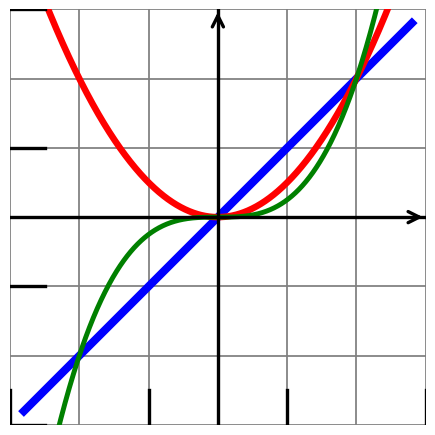

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio de la función
x = np.linspace(-1.4, 1.4, 1000)

# Definir las funciones
y1 = x
y2 = x**2
y3 = x**3

# Tamaño del gráfico en milímetros (sin contar márgenes)
width_mm = 174 + 30  # Ancho deseado en mm, Considera sumar 30 mm si quieres que te de la medida en los bordes
height_mm = 132  # Altura deseada en mm

# Convertir de mm a pulgadas (para figsize)
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

# Crear la figura y los ejes con el tamaño especificado
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Control de grosor de las líneas en mm
linewidth_mm_1 = 0.45  # Grosor en mm para la cuadrícula
linewidth_mm_2 = 0.85  # Grosor en mm para los ejes
linewidth_mm_3 = 1.25  # Grosor en mm para la funcion x
linewidth_mm_4 = 1.65  # Grosor en mm para la funcion x^2
linewidth_mm_5 = 2.05  # Grosor en mm para la funcion x^3
linewidth_pt_1 = linewidth_mm_1 * 2.83465  # Convertir a puntos
linewidth_pt_2 = linewidth_mm_2 * 2.83465  # Convertir a puntos
linewidth_pt_3 = linewidth_mm_3 * 2.83465  # Convertir a puntos
linewidth_pt_4 = linewidth_mm_4 * 2.83465  # Convertir a puntos
linewidth_pt_5 = linewidth_mm_5 * 2.83465  # Convertir a puntos

# Graficar las funciones
ax.plot(x, y1, label=r'$x$', color='blue', linestyle='-', linewidth=linewidth_pt_5)
ax.plot(x, y2, label=r'$x^2$', color='red', linestyle='-', linewidth=linewidth_pt_4)
ax.plot(x, y3, label=r'$x^3$', color='green', linestyle='-', linewidth=linewidth_pt_3)

# Divisiones en el eje x en múltiplos de 1
xticks = np.arange(-1.5, 2.0, 0.5)
ax.set_xticks(xticks)

# Divisiones en el eje y en múltiplos de 0.5
yticks = np.arange(-1.5, 2.0, 0.5)
ax.set_yticks(yticks)

# Añadir otros ejes en (0,0) con control de grosor
ax.axhline(0, color='black', linewidth=linewidth_pt_2)  # Eje horizontal en y=0
ax.axvline(0, color='black', linewidth=linewidth_pt_2)  # Eje vertical en x=0

# Personalización de la cuadrícula
ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=linewidth_pt_1)

# Ocultar las etiquetas del eje x y y pero mantener las líneas de la cuadrícula
ax.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, length=0)
ax.tick_params(axis='y', which='both', labelleft=False, labelright=False, length=0)

# Establecer límites de los ejes para que el recuadro del gráfico coincida con la cuadrícula
ax.set_xlim(xticks[0], xticks[-1])  # Limitar el eje x desde -4 hasta 4
ax.set_ylim(yticks[0], yticks[-1])  # Limitar el eje y desde -4 hasta 4

# Ocultar los ejes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añadir flechas en el extremo de los ejes
ax.annotate('', xy=(1.5 , 0), xytext=(1.4, 0),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

ax.annotate('', xy=(0, 1.5), xytext=(0, 1.4),
            arrowprops=dict(arrowstyle='->', linewidth=linewidth_pt_2, color='black', mutation_scale=20))

# Dibujar marcas adicionales en los ejes
for y in np.arange(-1.5, 2.0, 1.0):  # Marcas en el eje y
    ax.plot([-1.25, -1.5], [y, y], color='black', linewidth=linewidth_pt_2)

for x in np.arange(-1.5, 2.0, 1.0):  # Marcas en el eje x
    ax.plot([x, x], [-1.25, -1.5], color='black', linewidth=linewidth_pt_2)

# Ajustar márgenes para reducir el espacio alrededor del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Establecer una relación de aspecto específica
ax.set_aspect(1)  # Mantener proporción cuadrada

# Guardar el gráfico ajustando los bordes (bbox_inches='tight' elimina márgenes extra)
plt.savefig('zoom_x_x^2_x^3_plot.svg', format='svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


## Feedback


### Multiple Graphs

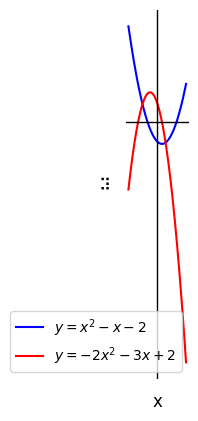

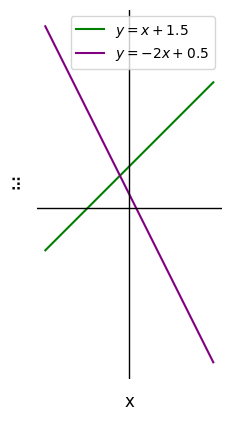

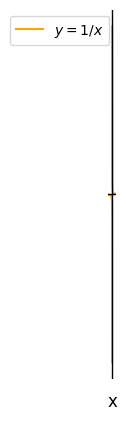

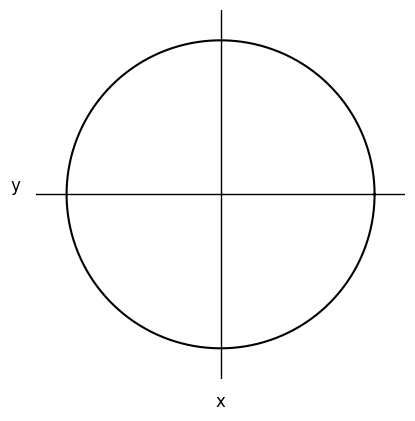

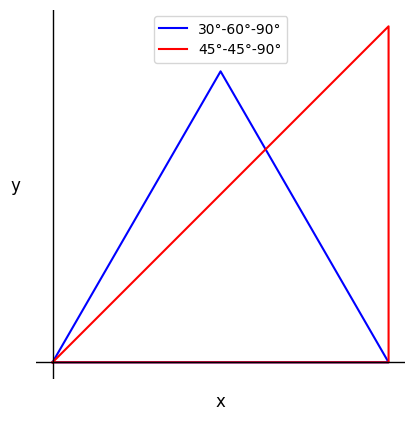

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def configure_axes(ax, xlabel='', ylabel='', braille_label=False):
    """Configura los ejes con etiquetas y sin bordes superiores/derechos."""
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(xlabel, fontsize=12, labelpad=10)
    if braille_label:
        ax.set_ylabel("⠽", fontsize=12, rotation=0, labelpad=15)
    else:
        ax.set_ylabel(ylabel, fontsize=12, rotation=0, labelpad=15)
    ax.set_aspect(1)

def plot_parabolas():
    """Grafica dos parábolas generales."""
    x = np.linspace(-3, 3, 400)
    y1 = x**2 - x - 2
    y2 = -2*x**2 - 3*x + 2
    fig, ax = plt.subplots()
    ax.plot(x, y1, label='$y = x^2 - x - 2$', color='blue')
    ax.plot(x, y2, label='$y = -2x^2 - 3x + 2$', color='red')
    configure_axes(ax, xlabel='x', ylabel='y = ax²+bx+c', braille_label=True)
    ax.legend()
    plt.show()

def plot_lines():
    """Grafica dos rectas generales."""
    x = np.linspace(-3, 3, 400)
    y1 = x + 1.5
    y2 = -2*x + 0.5
    fig, ax = plt.subplots()
    ax.plot(x, y1, label='$y = x + 1.5$', color='green')
    ax.plot(x, y2, label='$y = -2x + 0.5$', color='purple')
    configure_axes(ax, xlabel='x', ylabel='y = ax+b', braille_label=True)
    ax.legend()
    plt.show()

def plot_hyperbola():
    """Grafica una hipérbola estándar."""
    x = np.linspace(-3, 3, 400)
    y1 = 1/x
    fig, ax = plt.subplots()
    ax.plot(x[x>0], y1[x>0], label='$y = 1/x$', color='orange')
    ax.plot(x[x<0], y1[x<0], color='orange')
    configure_axes(ax, xlabel='x', ylabel='')
    ax.legend()
    plt.show()

def plot_unit_circle():
    """Dibuja el círculo trigonométrico."""
    theta = np.linspace(0, 2*np.pi, 300)
    x = np.cos(theta)
    y = np.sin(theta)
    fig, ax = plt.subplots()
    ax.plot(x, y, color='black')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    configure_axes(ax, xlabel='x', ylabel='y')
    plt.show()

def plot_special_triangles():
    """Dibuja los triángulos con ángulos notables."""
    fig, ax = plt.subplots()
    triangle_30_60 = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2], [0, 0]])
    triangle_45 = np.array([[0, 0], [1, 0], [1, 1], [0, 0]])
    ax.plot(triangle_30_60[:,0], triangle_30_60[:,1], color='blue', label='30°-60°-90°')
    ax.plot(triangle_45[:,0], triangle_45[:,1], color='red', label='45°-45°-90°')
    configure_axes(ax, xlabel='x', ylabel='y')
    ax.legend()
    plt.show()

# Llamadas a las funciones para mostrar los gráficos
plot_parabolas()
plot_lines()
plot_hyperbola()
plot_unit_circle()
plot_special_triangles()


### Trigonometric Circle

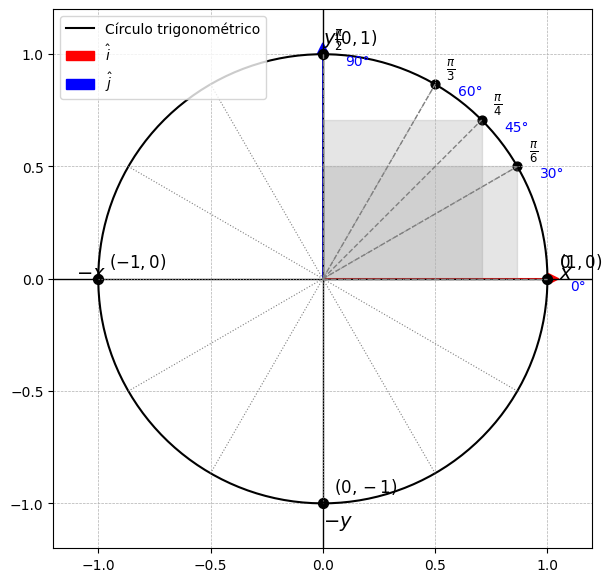

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')

# Dibujar el círculo trigonométrico
theta = np.linspace(0, 2*np.pi, 300)
ax.plot(np.cos(theta), np.sin(theta), 'black', linewidth=1.5, label="Círculo trigonométrico")

# Dibujar los ejes coordenados
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Agregar los vectores unitarios
ax.arrow(0, 0, 1, 0, head_width=0.05, head_length=0.05, fc='red', ec='red', label=r'$\hat{i}$')
ax.arrow(0, 0, 0, 1, head_width=0.05, head_length=0.05, fc='blue', ec='blue', label=r'$\hat{j}$')

# Ángulos notables en grados y radianes
angles = [(0, '0°', r'$0$'), (np.pi/6, '30°', r'$\frac{\pi}{6}$'), (np.pi/4, '45°', r'$\frac{\pi}{4}$'),
          (np.pi/3, '60°', r'$\frac{\pi}{3}$'), (np.pi/2, '90°', r'$\frac{\pi}{2}$')]

for angle, deg_label, rad_label in angles:
    x, y = np.cos(angle), np.sin(angle)
    ax.plot([0, x], [0, y], linestyle='dashed', color='gray', linewidth=1)
    ax.scatter([x], [y], color='black', s=40)
    ax.text(x + 0.05, y + 0.05, rad_label, fontsize=12, color='black')
    ax.text(x + 0.1, y - 0.05, deg_label, fontsize=10, color='blue')

# Etiquetas de los ejes
ax.text(1.05, 0, r'$x$', fontsize=14, color='black')
ax.text(0, 1.05, r'$y$', fontsize=14, color='black')
ax.text(-1.1, 0, r'$-x$', fontsize=14, color='black')
ax.text(0, -1.1, r'$-y$', fontsize=14, color='black')

# Agregar líneas de referencia para los ángulos notables
ticks = np.linspace(0, 2*np.pi, 12, endpoint=False)
for angle in ticks:
    ax.plot([0, np.cos(angle)], [0, np.sin(angle)], linestyle='dotted', color='gray', linewidth=0.8)

# Marcar los puntos (1,0), (0,1), (-1,0), (0,-1)
points = [(1, 0, r'$(1,0)$'), (-1, 0, r'$(-1,0)$'), (0, 1, r'$(0,1)$'), (0, -1, r'$(0,-1)$')]
for px, py, label in points:
    ax.scatter(px, py, color='black', s=50)
    ax.text(px + 0.05, py + 0.05, label, fontsize=12, color='black')

# Agregar el círculo unitario y sectores sombreados para ángulos notables
ax.fill_betweenx([0, np.sin(np.pi/4)], 0, np.cos(np.pi/4), color='gray', alpha=0.2)
ax.fill_betweenx([0, np.sin(np.pi/6)], 0, np.cos(np.pi/6), color='gray', alpha=0.2)

# Agregar leyenda y cuadrícula
ax.legend()
ax.grid(True, linestyle='dashed', linewidth=0.5)

# Mostrar el gráfico
plt.show()
